# Classification Model for Marketing Dataset|

UCCD2063 Artificial Intelligence Technique
<br></br>
Completed By:
- See Ling Xuan 1901373 P1

## Index

1. [Import Python Libraries](#Import-Python-Libraries)
2. [Data Collection](#Data-Collection)
3. [Data Exploration](#Data-Exploration)
4. [Data Visualization](#Data-Visualization)
5. [Data Preprocessing](#Data-Preprocessing)
6. [Declare Functions](#Declare-Functions)
7. [Model Training](#Model-Training)
8. [Fine Tune Model](#Fine-Tune-Model)
9. [Model Testing](#Model-Testing)
10. [Conclusion](#Conclusion)
---

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.mode.chained_assignment = None #turn off warning for SettingWithCopyWarning

---

# Data Collection

In [2]:
data = pd.read_csv("DataSet.csv", na_values = "?")

---

# Data Exploration

In [3]:
data.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# Number of null record per each feature
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

In [5]:
# Shape of dataset
print("Number of Features: ", data.shape[1])
print("Number of Instances: ", data.shape[0])

Number of Features:  17
Number of Instances:  45211


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      45211 non-null  int64 
 1   X2      45211 non-null  object
 2   X3      45211 non-null  object
 3   X4      45211 non-null  object
 4   X5      45211 non-null  object
 5   X6      45211 non-null  int64 
 6   X7      45211 non-null  object
 7   X8      45211 non-null  object
 8   X9      45211 non-null  object
 9   X10     45211 non-null  int64 
 10  X11     45211 non-null  object
 11  X12     45211 non-null  int64 
 12  X13     45211 non-null  int64 
 13  X14     45211 non-null  int64 
 14  X15     45211 non-null  int64 
 15  X16     45211 non-null  object
 16  y       45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Size of output y
data.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [8]:
# Features of data
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'y'],
      dtype='object')

## Numerical Features Analysis

In [9]:
data.describe()

,X1,X6,X10,X12,X13,X14,X15
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


There are totally 7 features of numerical type in this dataset including features 'X1', 'X6', 'X10', 'X12', 'X13', 'X14', 'X15'.

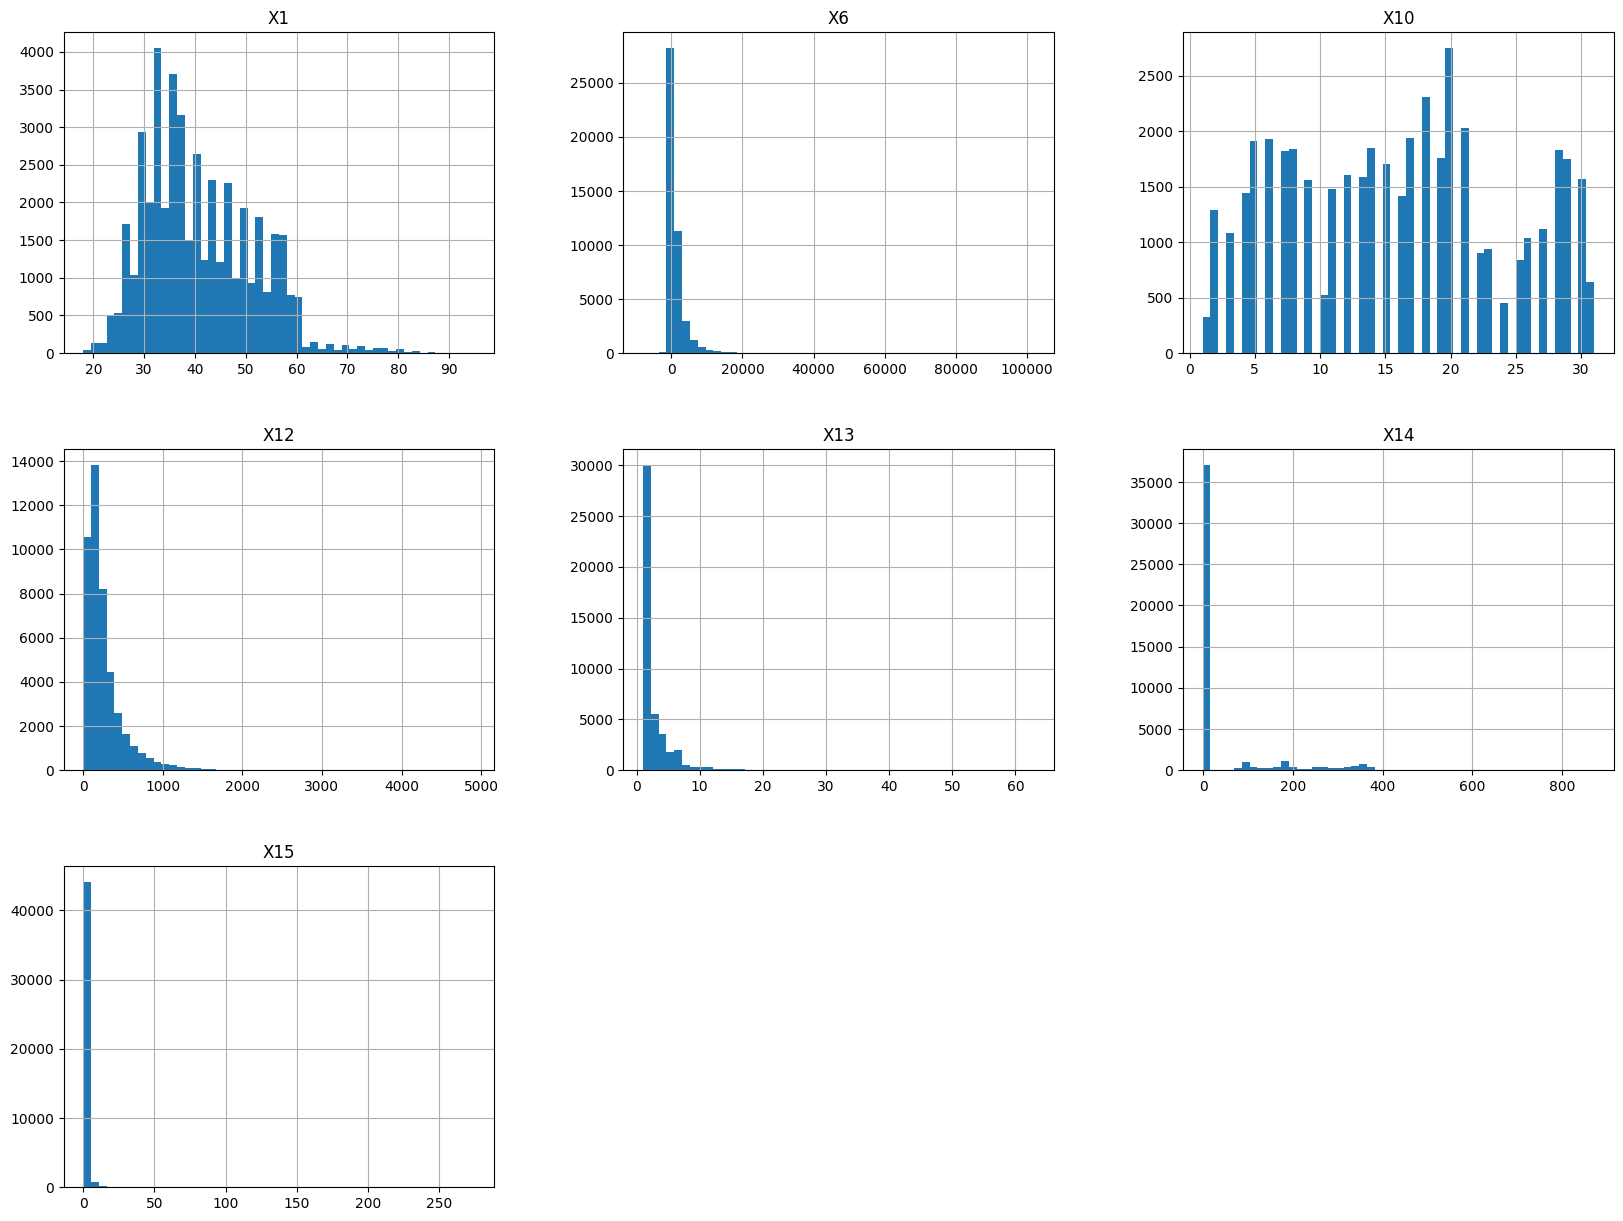

In [10]:
data.hist(bins = 50, figsize = (20,15))
plt.show() 

### Data Skewness

In [11]:
# Overview to data skewness
X1skewness = data.X1.skew(axis = 0, skipna = True)
X6skewness = data.X6.skew(axis = 0, skipna = True)
X10skewness = data.X10.skew(axis = 0, skipna = True)
X12skewness = data.X12.skew(axis = 0, skipna = True)
X13skewness = data.X13.skew(axis = 0, skipna = True)
X14skewness = data.X14.skew(axis = 0, skipna = True)
X15skewness = data.X15.skew(axis = 0, skipna = True)

print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X10 skewness: ', X10skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)

X1 skewness:  0.6848179257252598
X6 skewness:  8.360308326166326
X10 skewness:  0.09307901402122411
X12 skewness:  3.144318099423456
X13 skewness:  4.898650166179674
X14 skewness:  2.6157154736563477
X15 skewness:  41.84645447266292


From the result, we can see that all numerical features are positively skewed (skewed to the right) by having the skew value of >0. However, the feature 'X10' considered as no skewness due to the too low value. Most of the features are slightly positively skewed while the feature 'X15' have the highest skewness up to 41.85 to the right. As the data skewness can lower the model's performance, the data skewness can then be pre-processed by using normalization technique.

Next, we use seaborn to observe the skewness of each numerical feature.

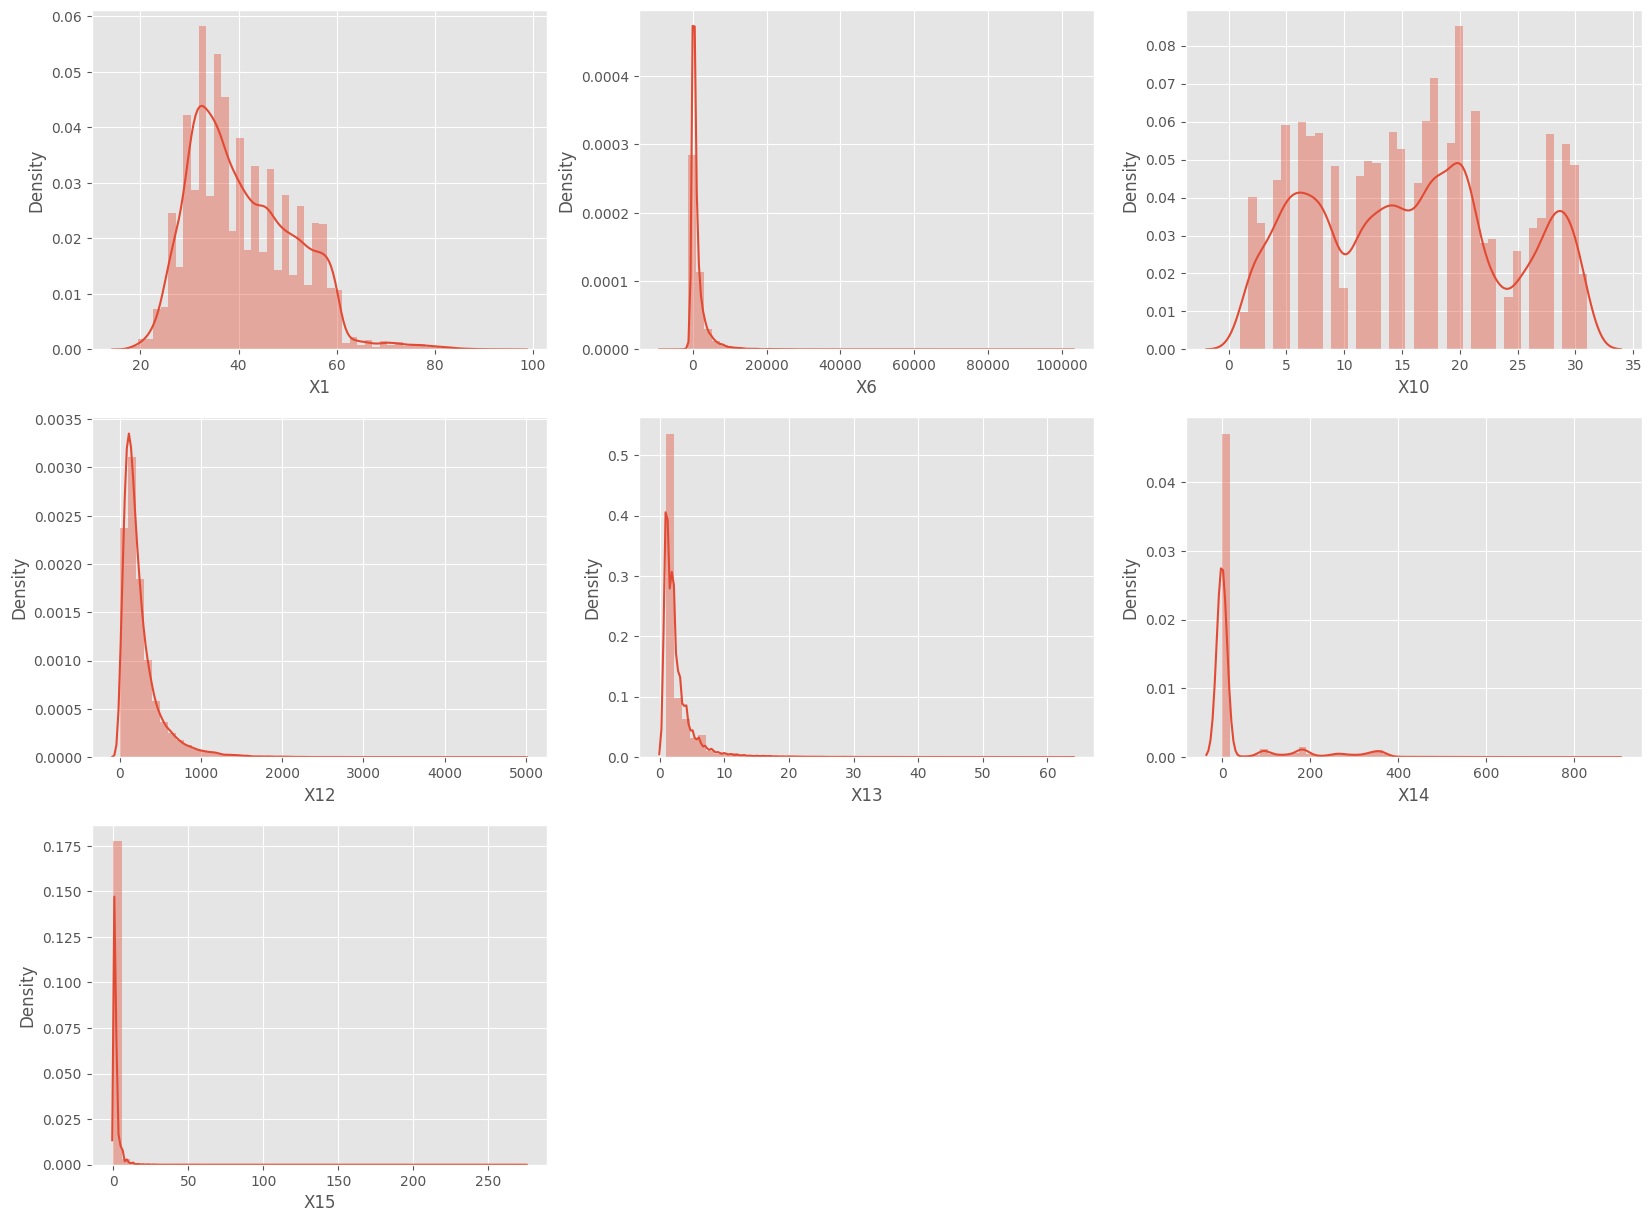

In [12]:
plt.style.use("ggplot") # Beautify purpose
figure, axes = plt.subplots(3,3,figsize=(20,15))
# plt.subplots_adjust(wspace=1, hspace=1)

sns.distplot(data.X1, ax=axes[0][0])
sns.distplot(data.X6, ax=axes[0][1])
sns.distplot(data.X10, ax=axes[0][2])
sns.distplot(data.X12, ax=axes[1][0])
sns.distplot(data.X13, ax=axes[1][1])
sns.distplot(data.X14, ax=axes[1][2])
sns.distplot(data.X15, ax=axes[2][0])

# sns.histplot(data=data, x='X1', kde=True, stat='density', linewidth=0, ax=axes[0][0])       
# sns.histplot(data=data, x='X6', kde=True, stat='density', linewidth=0, ax=axes[0][1])       
# sns.histplot(data=data, x='X10', kde=True, stat='density', linewidth=0, ax=axes[0][2])       
# sns.histplot(data=data, x='X12', kde=True, stat='density', linewidth=0, ax=axes[1][0])       
# sns.histplot(data=data, x='X13', kde=True, stat='density', linewidth=0, ax=axes[1][1])       
# sns.histplot(data=data, x='X14', kde=True, stat='density', linewidth=0, ax=axes[1][2])       
# sns.histplot(data=data, x='X15', kde=True, stat='density', linewidth=0, ax=axes[2][0]) 

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.show()

## Categorical Features Analysis

In [13]:
cat_data = data.select_dtypes(include= object)
cat_data.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Output Vector Analysis

In [14]:
cat_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Assume record with value 'yes': positive sample, others with value 'no': negative sample.

Thus, this is an imbalanced dataset with 39922 negative samples and 5289 positive samples. Imbalance characteristic of a dataset can affect its performance and the performance metrics need to be carefully indicated. For example, avoid using Accuracy which is not suitable to be applied in imbalance dataset.

### Remove Output Vector

We remove the output vector of "y" for now and will then add it to the training and test set.

In [15]:
ori_data = data.copy() # Keep the original dataset
cat_data.drop('y', axis=1, inplace=True)
cat_data.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown
4,unknown,single,unknown,no,no,no,unknown,may,unknown


In [16]:
# Number of unique values for each categorical feature
cat_data.select_dtypes('object').nunique()

X2     12
X3      3
X4      4
X5      2
X7      2
X8      2
X9      3
X11    12
X16     4
dtype: int64

In [17]:
# Details of each unique value for each categorical feature
for col in cat_data.columns:
        print(col,":")
        print(cat_data[col].value_counts(), "\n")

X2 :
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: X2, dtype: int64 

X3 :
married     27214
single      12790
divorced     5207
Name: X3, dtype: int64 

X4 :
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: X4, dtype: int64 

X5 :
no     44396
yes      815
Name: X5, dtype: int64 

X7 :
yes    25130
no     20081
Name: X7, dtype: int64 

X8 :
no     37967
yes     7244
Name: X8, dtype: int64 

X9 :
cellular     29285
unknown      13020
telephone     2906
Name: X9, dtype: int64 

X11 :
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: X11, dtype: int64 

X16 :
unknown    36959
failure     4901
other       1840
success     1511

We observe there is **unknown** value for several categorical features in this dataset. The unknown value will be assumed as null value existed in the dataset and will be processed in the further data pre-processing step.
<br></br>
From observing the categorical data, we can see that most of them are nominal features in this dataset. For nominal features, we can simply use one hot encoding as the order of it is not important. For feature **'X4'**, even it has ranks of primary, secondary, and tertiary, but it considered as nominal feature due to it also consist of unknown value that has no rank.

Next, we provide an overview to the categorical features visualization.

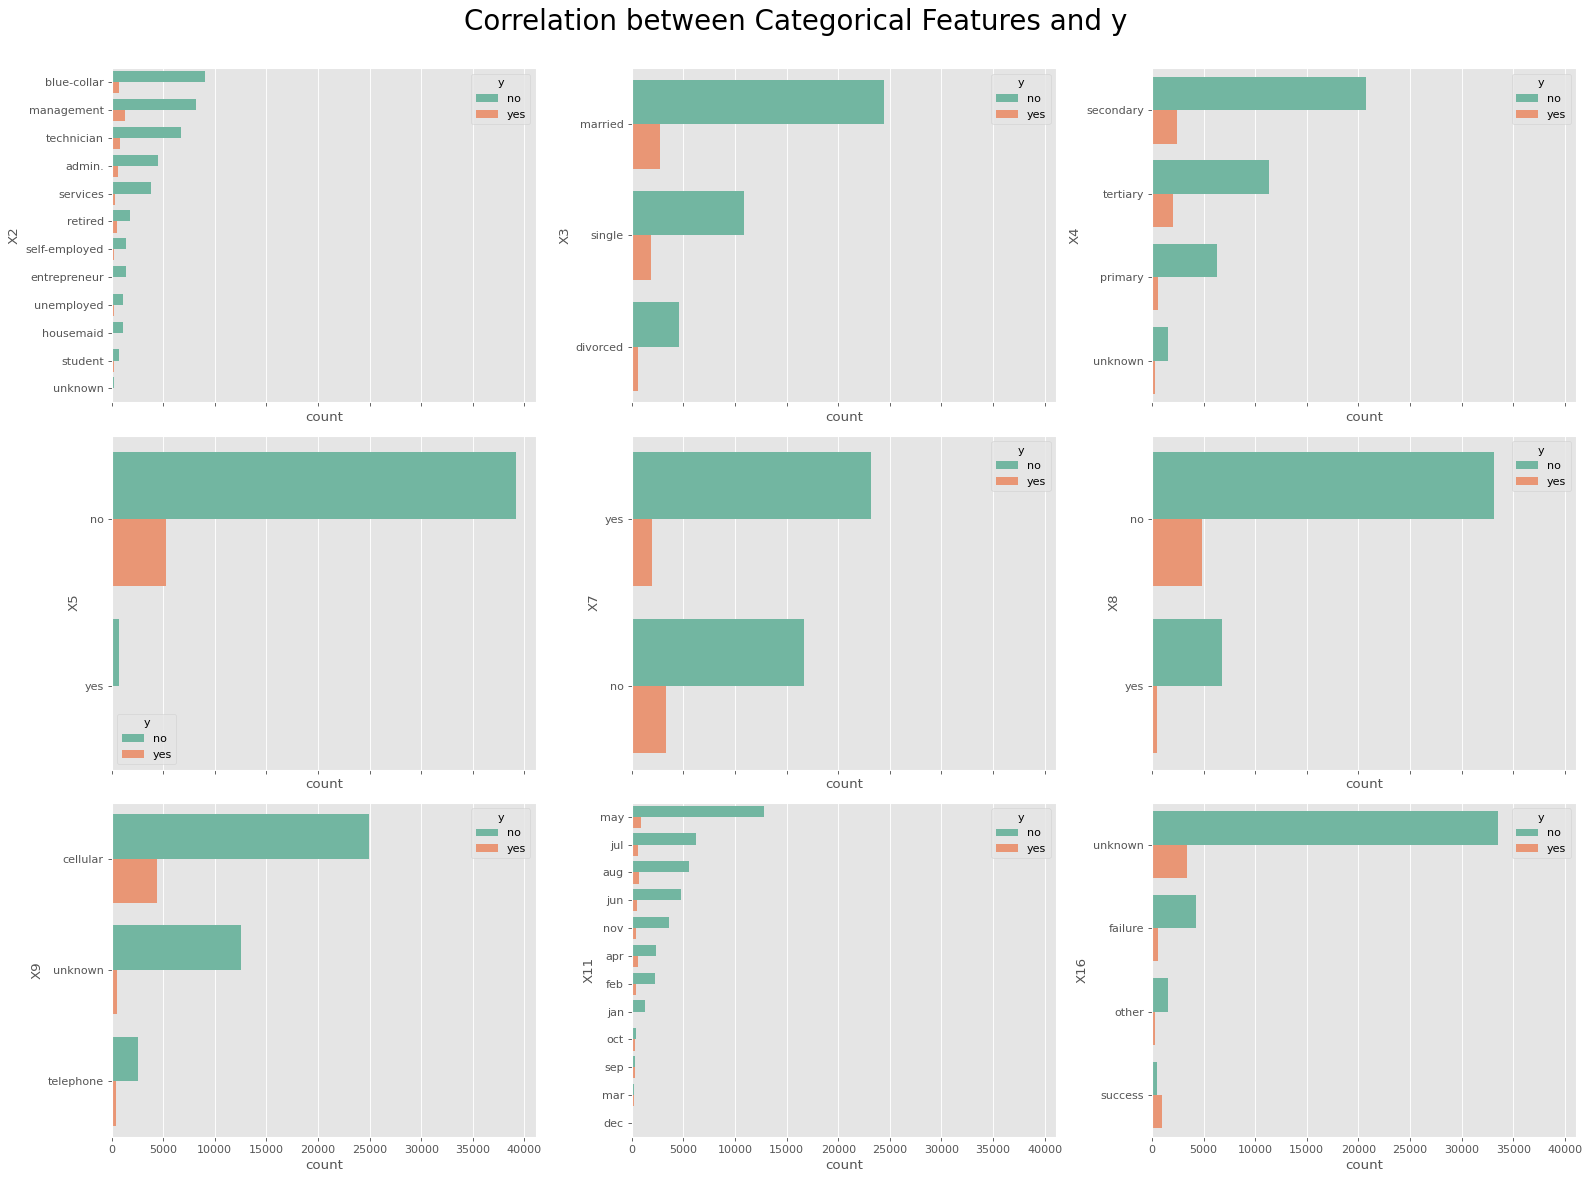

In [18]:
df = cat_data

figure, axes = plt.subplots(3,3,figsize=(20,15), dpi=80, sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, df):
    sns.countplot(y=col, hue='y', data=data, ax=ax, order = df[col].value_counts().index, palette='Set2')

plt.suptitle('Correlation between Categorical Features and y\n', fontsize = 25)
plt.tight_layout()  
plt.show()

From above visualization, we can gain an insight that all categorical features have quite a good correlation with the output vector 'y'.

Next, the data visualization of this dataset will be depicted by using matplotlib and seaborn to visualize data in several graphs and tables form.

---

# Data Visualization

## Correlation

1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [19]:
data.corr()

,X1,X6,X10,X12,X13,X14,X15
X1,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
X6,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
X10,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
X12,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
X13,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
X14,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
X15,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


Text(0.5, 1.0, 'Correlation Matrix and Heatmap')

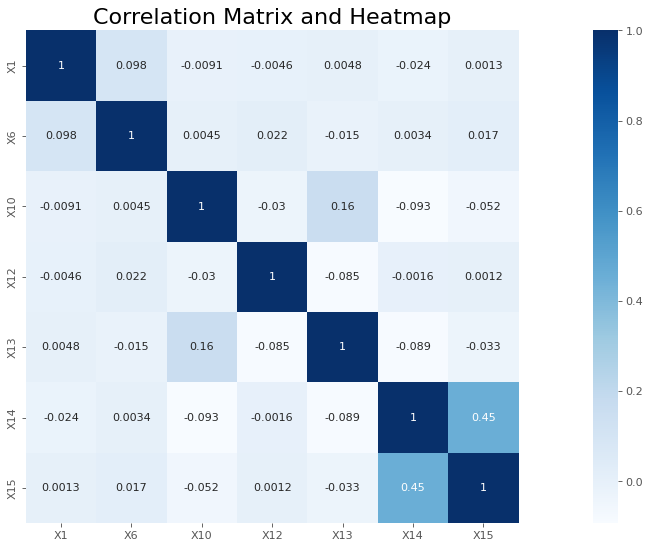

In [20]:
plt.figure(figsize =(24,8), dpi=80)
corrmat = data.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  # Blues
plt.title('Correlation Matrix and Heatmap',fontsize = 20)

From the correlation diagram, most of the features do not have strong correlation between each other. Features 'X14' and 'X15' are the features combination that have the strongest positive correlation but the correlation value of 0.45 which do not more than 0.70 is considered in the acceptable range. Therefore, the features should be retained.

### Feature Prediction

In [21]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Assume feature **'X2'** is **job position** based on its values such as 'management', 'technicial', 'blue-collar'.

Assume feature **'X3'** is **marital status** according to its values of 'married', 'single'.

Assume feature **'X11'** is **month** as it contains values from 'jan' to 'dec' that can indicate the 12 months in a year.

In [22]:
print("X1 min: {0}, max: {1}".format(data.X1.min(), data.X1.max()))

X1 min: 18, max: 95


Assume feature **'X1'** is **age** as its values including the minimum value of '18' and maximum value of '95' within the range of human's ag.

In [23]:
data.X9.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

Assume feature **'X9'** is the **phone type** by considering its values of 'cellular' or 'telephone'

In [24]:
print("X10 min: {0}, max: {1}".format(data.X10.min(), data.X10.max()))

X10 min: 1, max: 31


Assume feature **'X10'** is the **day** due to it has values from 1 to 31 that fit the maximum number of days per month

### Data Visualization

The below graphs visualize the data in different form such as graph or chart.

### Relationship between X1 and X9

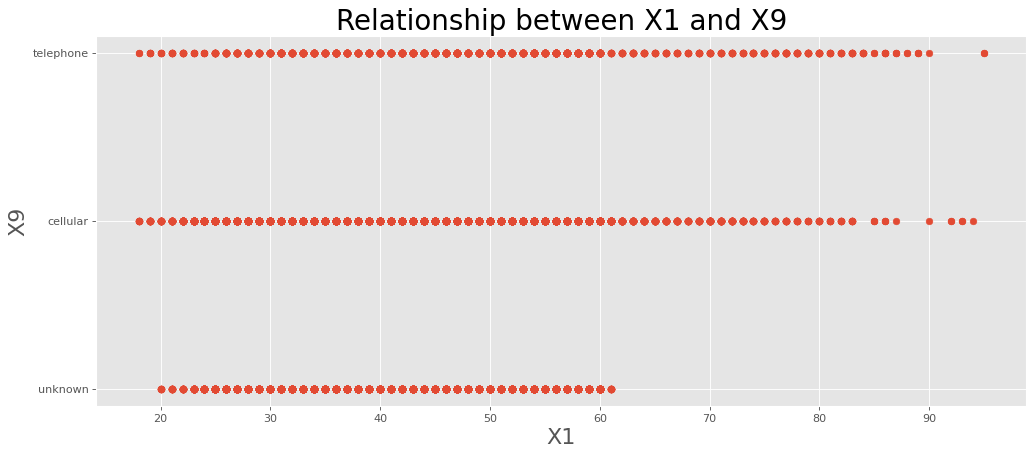

In [25]:
# X1 against X9, Assume X1 is age and presume older generation prefer using cellular phone than telephone
# Based on below graph, it proves that X1 may not be the age as it not satisfy our prediction
# However, we gain another insight that data with 'unknown' value in X9 are all having value less than 70 for X1 feature

plt.figure(figsize = (15,6), dpi = 80)
plt.scatter(data['X1'],data['X9'])
plt.xlabel('X1', fontsize=20)
plt.ylabel('X9', fontsize=20)
plt.title("Relationship between X1 and X9", fontsize=25)
plt.show()

### Relationship Between X14 and X15

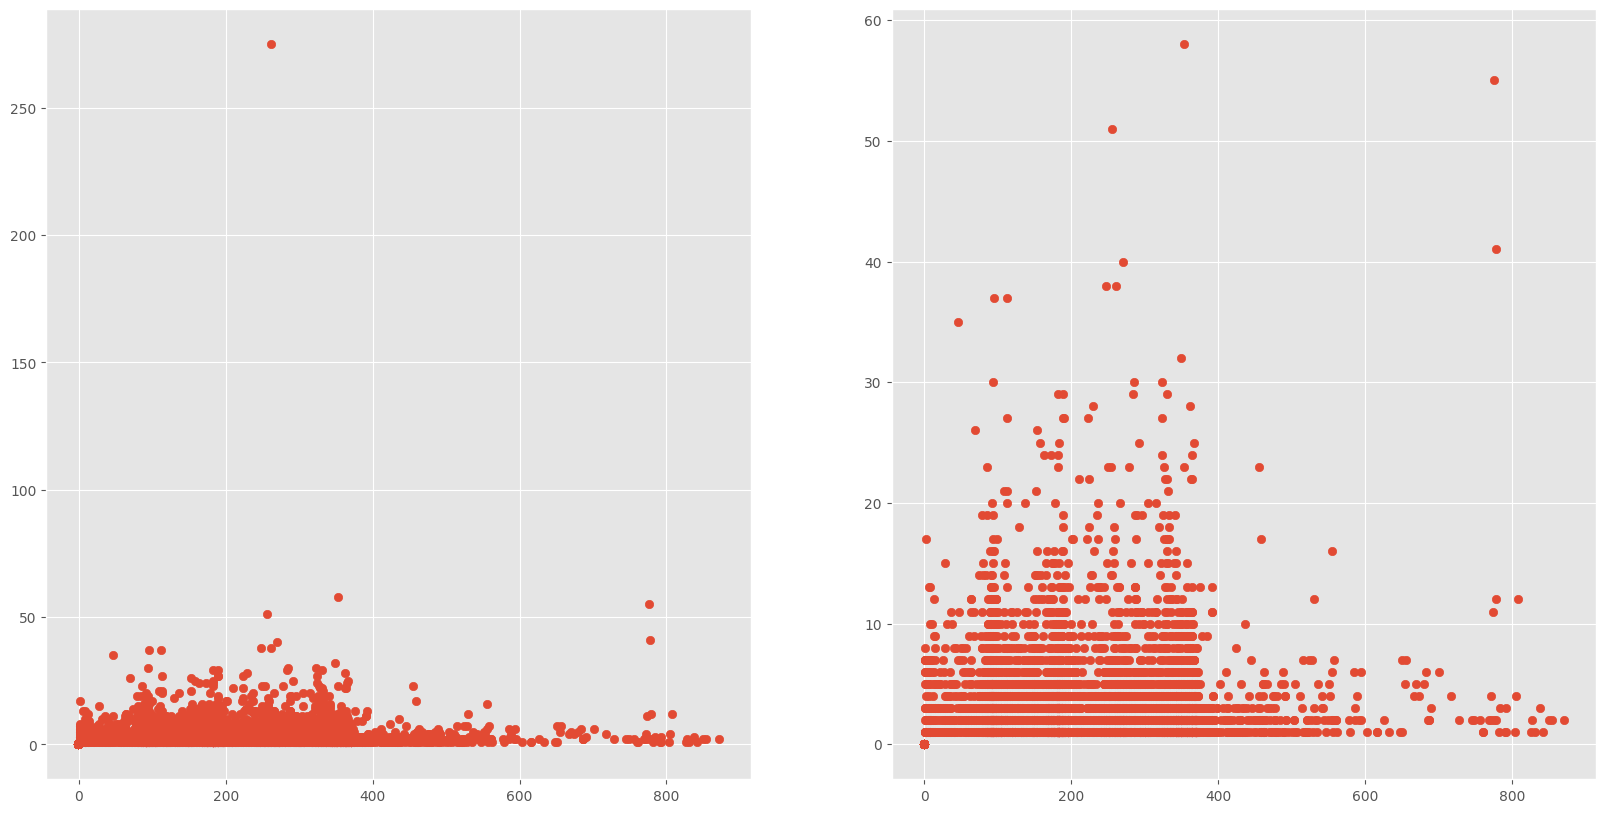

In [26]:
# X14 agains X15, which are the pair that has the highest correlation
# Discover an extreme value in feature X15, to improve the data visualization, we create another graph to remove the extreme value from the feature X15
# Based on the result, we observe that most data are generated in the bottom left corner;
#     indicate data with lower X14 value tends to also have lower X15 value

figure, axes = plt.subplots(1,2,figsize=(20,10)) 

axes[0].scatter(data['X14'], data['X15'])

# Remove extreme value
index_to_drop = data['X15'][data['X15'] == data['X15'].max()].index
axes[1].scatter(data.drop(index=index_to_drop, axis=0)['X14'], data.drop(index=index_to_drop, axis=0)['X15'])

---

# Train, Test Splitting

### Undersampling

Before splitting data, we need to address the problem of imbalance dataset to improve the data quality. Thus, to increase the model's performance during the model training stage. 

There are two techniques can be applied on imbalance dataset to solve the classification problem which are:
- **Random Oversampling**: Randomly duplicate records in the minority class
- **Random Undersampling**: Randomly remove records in the majority class

In this case, we choose to perform the random undersampling due to there is enough amount of data for model training even after removed some records that contribute to poor data quality. Also, the weakness of undersampling including the losing information invaluable to a model. However, we prefer to have a more balance dataset.

In [27]:
# import necessary package
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X = data.drop('y', axis=1)
y = data['y']
X_over, y_over = undersample.fit_resample(X, y)

data = pd.concat([X_over, y_over], axis = 1)

### Train Test Split

In [28]:
# Load the python library of sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing data set
train, test = train_test_split(data, test_size = 0.2, random_state = 2)

print('Original Dataset Shape\t: ', data.shape)
print('Training Dataset Shape\t: ', train.shape)
print('Testing Dataset Shape\t: ', test.shape)

Original Dataset Shape	:  (10578, 17)
Training Dataset Shape	:  (8462, 17)
Testing Dataset Shape	:  (2116, 17)


# Data Preprocessing

### Missing Value

In [29]:
data.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
y      0
dtype: int64

### Duplicate Value

In [30]:
data.duplicated().sum()

0

There is no empty value or duplicate value in this dataset.

## Data Preprocessing - Numerical Data (Train dataset)

In [31]:
data.describe()

,X1,X6,X10,X12,X13,X14,X15
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,41.231707,1586.333901,15.584042,378.248251,2.501134,52.263188,0.817262
std,11.987778,3310.909079,8.411454,352.331125,2.691129,109.405901,2.161831
min,18.000000,-8019.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,8.000000,143.000000,1.000000,-1.000000,0.000000
50%,39.000000,558.000000,15.000000,257.500000,2.000000,-1.000000,0.000000
75%,49.000000,1765.000000,21.000000,504.000000,3.000000,55.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,44.000000,854.000000,58.000000


### Select Numerical Features

In [32]:
num_data = data.select_dtypes(include={int, float})
num_data.head(5)

,X1,X6,X10,X12,X13,X14,X15
0,38,947,12,361,2,-1,0
1,43,1667,4,1213,3,-1,0
2,60,2063,21,54,5,86,3
3,43,533,31,228,2,-1,0
4,62,1625,23,155,1,-1,0


### Feature Selection

In [33]:
num_data.nunique()

X1       76
X6     3763
X10      31
X12    1426
X13      37
X14     464
X15      29
dtype: int64

Based on above observation of no column consist of total unique values that is equal to the total row number, we can conclude no numerical feature is used as an index column. Also, based on the correlation analysis as conducted in the Data Exploration section, no features have high correlation. So, no feature is dropped.

### Outliers

<AxesSubplot: >

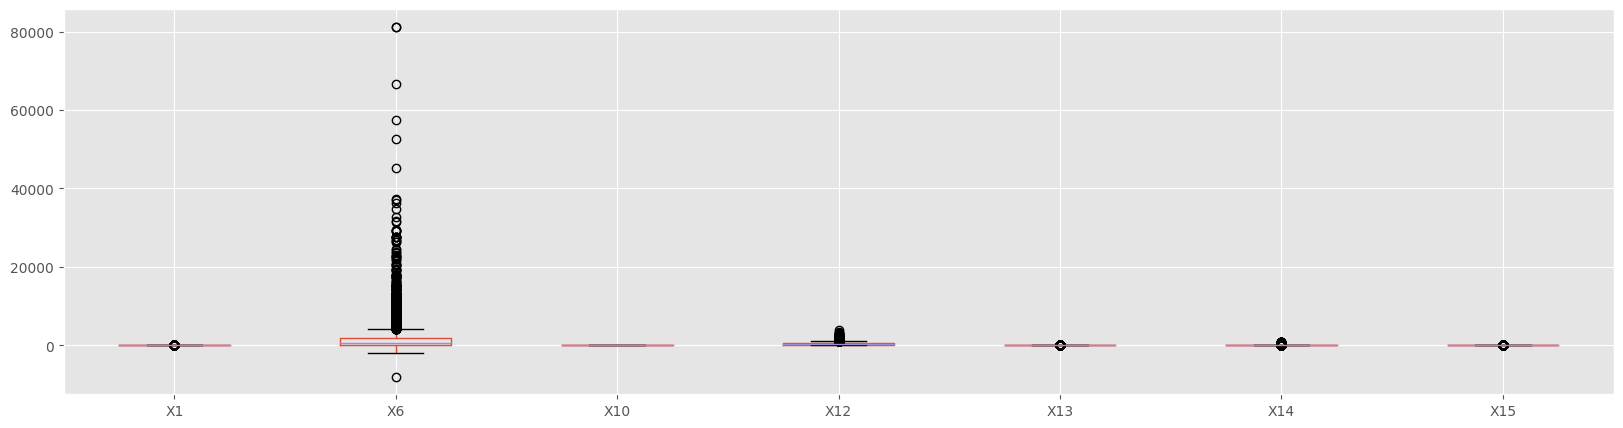

In [34]:
num_data_train = train.select_dtypes(include={int, float})
num_data_train.boxplot(figsize=(20,5))

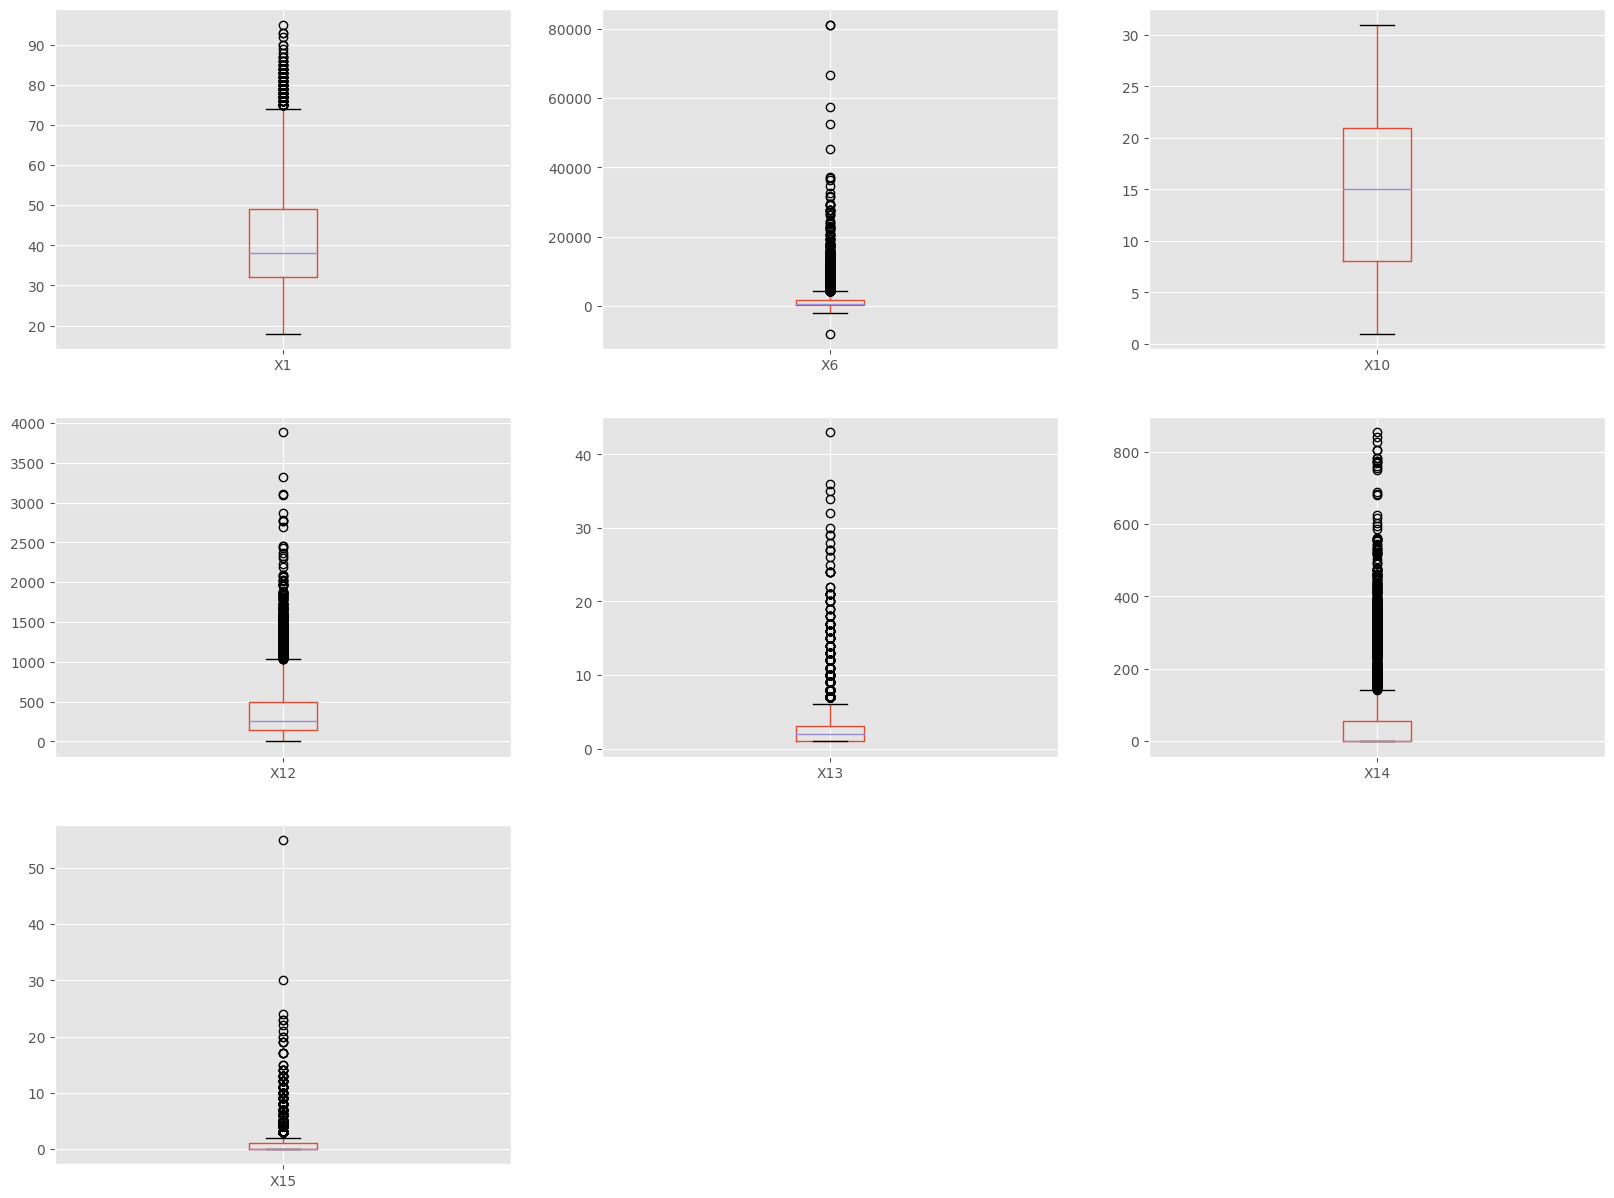

In [35]:
# For better visualization
figure, axes = plt.subplots(3,3,figsize=(20,15)) 

num_data_train.boxplot(column='X1', ax=axes[0][0])
num_data_train.boxplot(column='X6', ax=axes[0][1])
num_data_train.boxplot(column='X10', ax=axes[0][2])
num_data_train.boxplot(column='X12', ax=axes[1][0])
num_data_train.boxplot(column='X13', ax=axes[1][1])
num_data_train.boxplot(column='X14', ax=axes[1][2])
num_data_train.boxplot(column='X15', ax=axes[2][0])

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.show()

From the generated boxplots, we can observe that all numerical features consist of outliers except for the feature 'X10'. Outliers can highly effect the model's performance and accuracy since it affects the measures such as mean, median, and standard deviation, therefore, the outliers should be handled for each feature by removing or other methods. Below summarize the number of outliers per each numerical feature except the feature 'X10'.

#### Handle Outliers

In [36]:
num_data_with_outliers = num_data_train[['X1', 'X6', 'X12', 'X13', 'X14', 'X15']] # to map type
Q1 = num_data_with_outliers.quantile(0.25)
Q3 = num_data_with_outliers.quantile(0.75)
IQR = Q3 - Q1

((num_data_with_outliers < (Q1 - 1.5 * IQR)) | (num_data_with_outliers > (Q3 + 1.5 * IQR))).sum()

X1      124
X6      818
X12     480
X13     431
X14    1422
X15     933
dtype: int64

In [37]:
# Z-score
Z = (num_data_train-num_data_train.mean())/num_data_train.std()
Z.describe()

,X1,X6,X10,X12,X13,X14,X15
count,8.462000e+03,8.462000e+03,8.462000e+03,8.462000e+03,8.462000e+03,8.462000e+03,8.462000e+03
mean,2.289195e-16,4.880678e-18,1.448459e-17,4.198433e-17,-6.087727e-17,2.435091e-17,-6.717492e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.932462e+00,-2.857383e+00,-1.724617e+00,-1.073187e+00,-5.697357e-01,-4.864848e-01,-3.898707e-01
25%,-7.644625e-01,-4.328696e-01,-8.956040e-01,-6.733418e-01,-5.697357e-01,-4.864848e-01,-3.898707e-01
50%,-2.638913e-01,-3.040265e-01,-6.659089e-02,-3.454111e-01,-1.847558e-01,-4.864848e-01,-3.898707e-01
75%,6.538226e-01,4.709345e-02,6.439918e-01,3.593521e-01,2.002241e-01,3.168304e-02,9.118586e-02
max,4.491535e+00,2.369175e+01,1.828296e+00,1.008509e+01,1.559942e+01,7.286033e+00,2.606824e+01


In [38]:
z_scores = stats.zscore(num_data_train)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1) # data with z-score >3 or <-3 are outliers

num_data_train_filtered = num_data_train[filtered_entries]

print("Number of rows before discarding outliers\t: ",num_data_train.shape[0])
print("Number of rows after discarding outliers\t: ",num_data_train_filtered.shape[0])
print("Number of outliers removed\t\t\t: ",num_data_train.shape[0]-num_data_train_filtered.shape[0])

Number of rows before discarding outliers	:  8462
Number of rows after discarding outliers	:  7692
Number of outliers removed			:  770


According to above result, if we choose to remove outliers from the dataset, many records will be removed and can highly decrease our number of records. We prefer large amount of data than normal distributed data and therefore, we decided to **keep the data with outliers** and assume those outliers are part of the data pattern.

The outliers can be decreased by performing the skewness correction and standardization processes after.

### Feature Scaling

#### Correct Data Skewness

In [39]:
# Overview to data skewness
X1skewness = train.X1.skew(axis = 0, skipna = True)
X6skewness = train.X6.skew(axis = 0, skipna = True)
X12skewness = train.X12.skew(axis = 0, skipna = True)
X13skewness = train.X13.skew(axis = 0, skipna = True)
X14skewness = train.X14.skew(axis = 0, skipna = True)
X15skewness = train.X15.skew(axis = 0, skipna = True)

print('- Before Log Transform -')
print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)

- Before Log Transform -
X1 skewness:  0.8575543196780266
X6 skewness:  8.270086375466889
X12 skewness:  2.1262121961437295
X13 skewness:  4.833090954493805
X14 skewness:  2.399248025821936
X15 skewness:  5.927749944455591


Acceptable skewness range is from -3 to 3. Therefore in this dataset, we consider features 'X6', 'X13', 'X15' are skewed and will correct their skewness.

In [40]:
num_data_train.describe()

,X1,X6,X10,X12,X13,X14,X15
count,8462.000000,8462.000000,8462.000000,8462.000000,8462.000000,8462.000000,8462.000000
mean,41.163082,1583.734224,15.562278,375.076814,2.479910,52.514772,0.810447
std,11.986307,3360.675075,8.443774,347.634466,2.597538,110.002968,2.078758
min,18.000000,-8019.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,129.000000,8.000000,141.000000,1.000000,-1.000000,0.000000
50%,38.000000,562.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1742.000000,21.000000,500.000000,3.000000,56.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,43.000000,854.000000,55.000000


We perform Log Transform to reduce the skewness of features 'X6', 'X13', 'X15' those are positively skewed as discovered in the data exploration section. For the column 'X15' which contain negative value, we perform log transform by adding each row with a constant value to make the value of each of the row > 0. From the below observation, we can see that the the feature 'X15' consist of values <= 0.


From the data description, we can know that the minimum value of column 'X15' is 0. Therefore, we will add constant values to each of these columns' data to make the minimum value become 1.0.


For column 'X6', since this feature's values are large with maximum value of 102127.0 and minimum value of -8019.0, we will perform cube root function on each record to correct the data skewness.

In [41]:
num_data_train[num_data<=0].count()

X1        0
X6     1124
X10       0
X12       0
X13       0
X14    6275
X15    6275
dtype: int64

In [42]:
# Log Transform to features 'X13', 'X15'

num_data_train['X13'] = np.log(num_data_train['X13'])
num_data_train['X15'] = np.log(num_data_train['X15']+1)

# Cube root for feature 'X6'
num_data_train['X6'] = np.cbrt(num_data_train['X6'])

In [43]:
X1skewness = num_data_train.X1.skew(axis = 0, skipna = True)
X6skewness = num_data_train.X6.skew(axis = 0, skipna = True)
X12skewness = num_data_train.X12.skew(axis = 0, skipna = True)
X13skewness = num_data_train.X13.skew(axis = 0, skipna = True)
X14skewness = num_data_train.X14.skew(axis = 0, skipna = True)
X15skewness = num_data_train.X15.skew(axis = 0, skipna = True)

print()
print('- After Log Transform -')
print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)


- After Log Transform -
X1 skewness:  0.8575543196780266
X6 skewness:  -0.045159275731915305
X12 skewness:  2.1262121961437295
X13 skewness:  0.9205256119129703
X14 skewness:  2.399248025821936
X15 skewness:  1.8445322313202657


From the above data, the data skewness had been highly decreased and fit in the acceptable range after the data skewness correction.

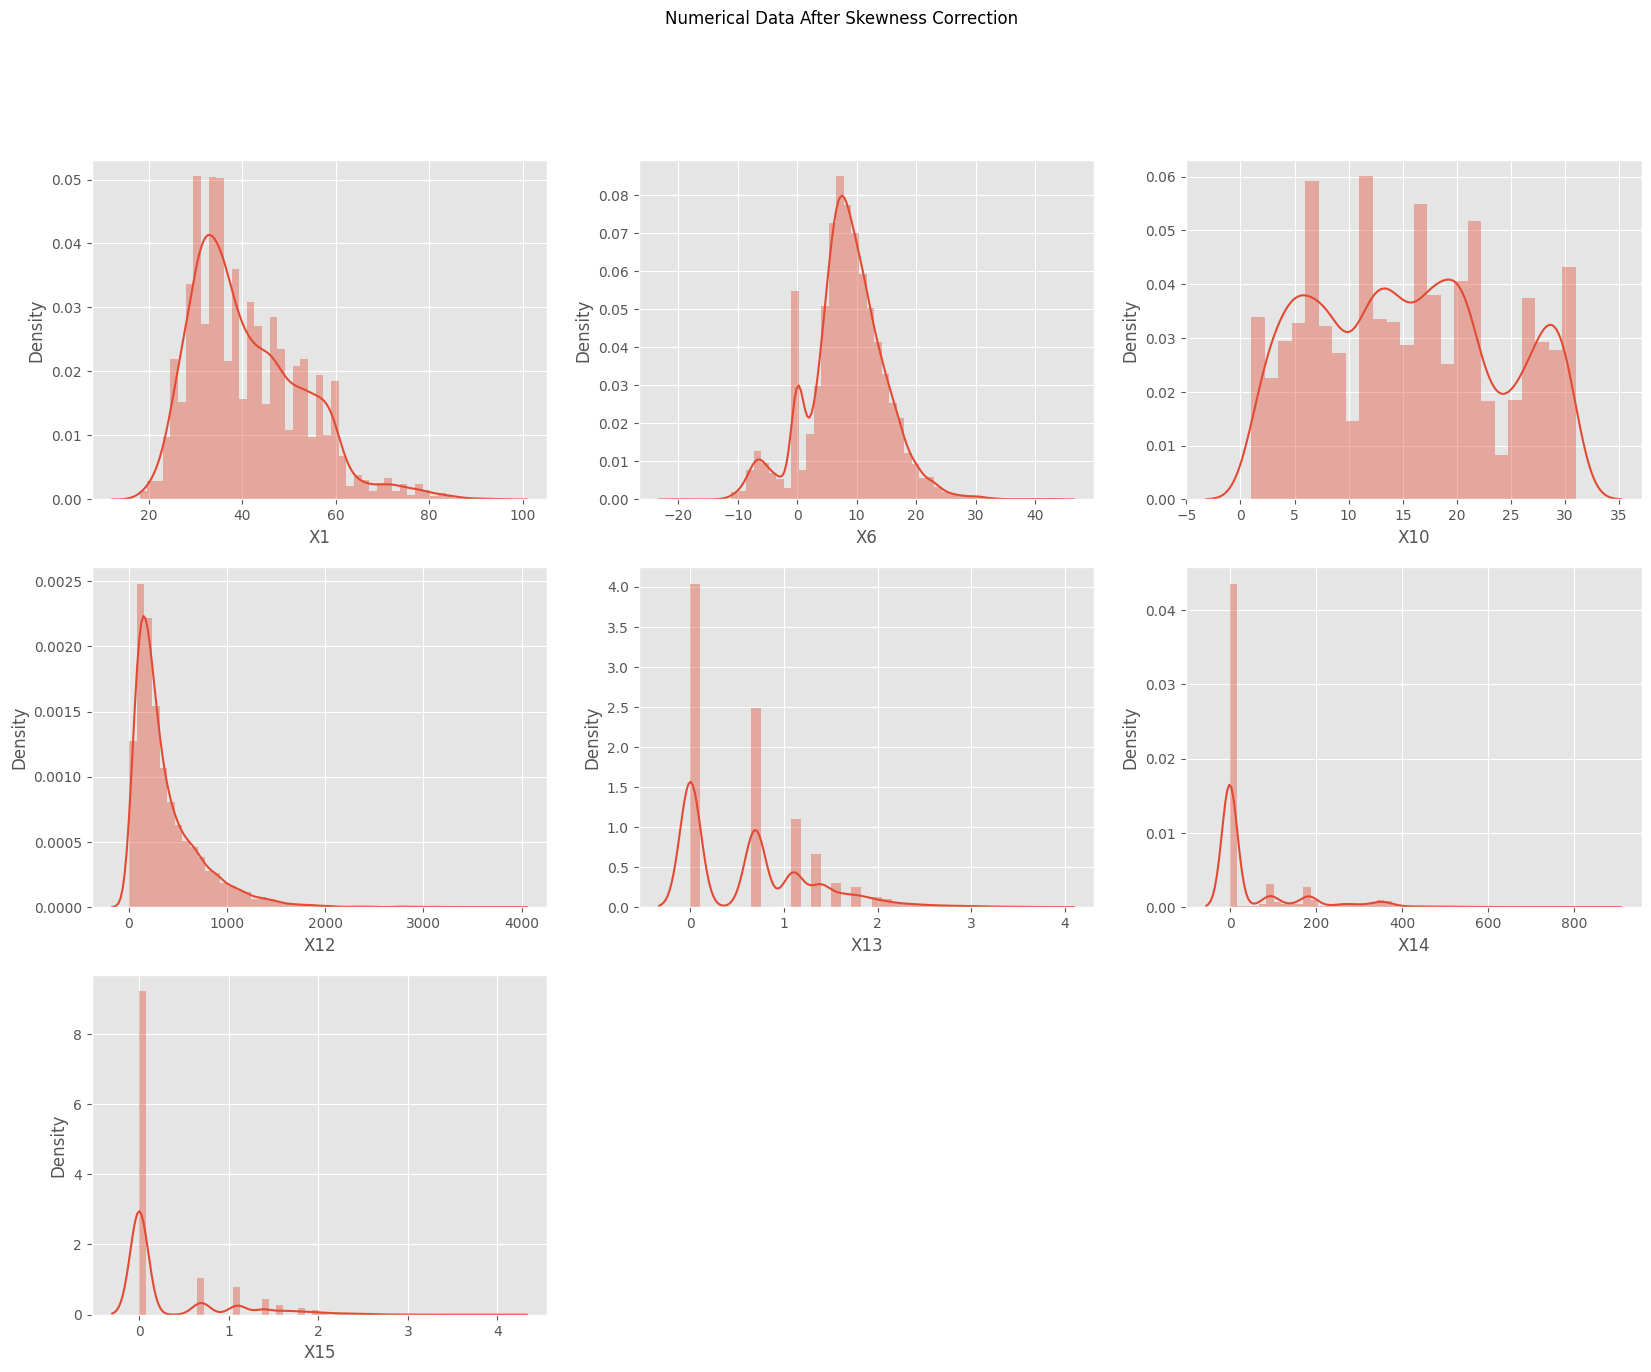

In [44]:
plt.style.use("ggplot") # Beautify purpose
figure, axes = plt.subplots(3,3,figsize=(20,15))
# plt.subplots_adjust(wspace=1, hspace=1)

sns.distplot(num_data_train.X1, ax=axes[0][0])
sns.distplot(num_data_train.X6, ax=axes[0][1])
sns.distplot(num_data_train.X10, ax=axes[0][2])
sns.distplot(num_data_train.X12, ax=axes[1][0])
sns.distplot(num_data_train.X13, ax=axes[1][1])
sns.distplot(num_data_train.X14, ax=axes[1][2])
sns.distplot(num_data_train.X15, ax=axes[2][0])

# sns.histplot(data=data, x='X1', kde=True, stat='density', linewidth=0, ax=axes[0][0])       
# sns.histplot(data=data, x='X6', kde=True, stat='density', linewidth=0, ax=axes[0][1])       
# sns.histplot(data=data, x='X10', kde=True, stat='density', linewidth=0, ax=axes[0][2])       
# sns.histplot(data=data, x='X12', kde=True, stat='density', linewidth=0, ax=axes[1][0])       
# sns.histplot(data=data, x='X13', kde=True, stat='density', linewidth=0, ax=axes[1][1])       
# sns.histplot(data=data, x='X14', kde=True, stat='density', linewidth=0, ax=axes[1][2])       
# sns.histplot(data=data, x='X15', kde=True, stat='density', linewidth=0, ax=axes[2][0]) 

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.suptitle('Numerical Data After Skewness Correction')
plt.show()

#### Standardization

In [45]:
for i in num_data_train.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(num_data_train[[i]])
    
    # transform the training data column
    num_data_train[i] = scale.transform(num_data_train[[i]])

In [46]:
print('Mean:\n',num_data_train.mean(axis = 0))
print('\nStandard Deviation:\n',num_data_train.std (axis = 0))

Mean:
 X1     2.269253e-16
X6     3.610652e-17
X10    1.616397e-17
X12    3.862558e-17
X13   -1.469451e-17
X14   -3.652636e-17
X15    5.311017e-17
dtype: float64

Standard Deviation:
 X1     1.000059
X6     1.000059
X10    1.000059
X12    1.000059
X13    1.000059
X14    1.000059
X15    1.000059
dtype: float64


## Data Preprocessing - Numerical Data (Test dataset)

Same data preprocessing steps those had performed to the traning dataset will be performed to the test set.

### Outliers

<AxesSubplot: >

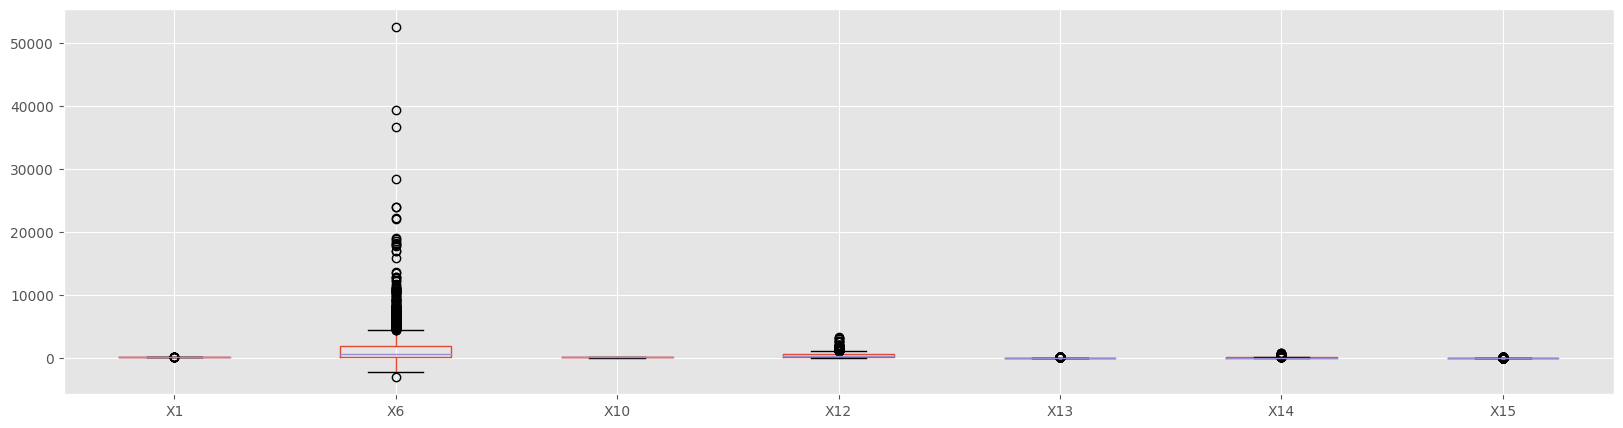

In [47]:
num_data_test = test.select_dtypes(include={int, float})
num_data_test.boxplot(figsize=(20,5))

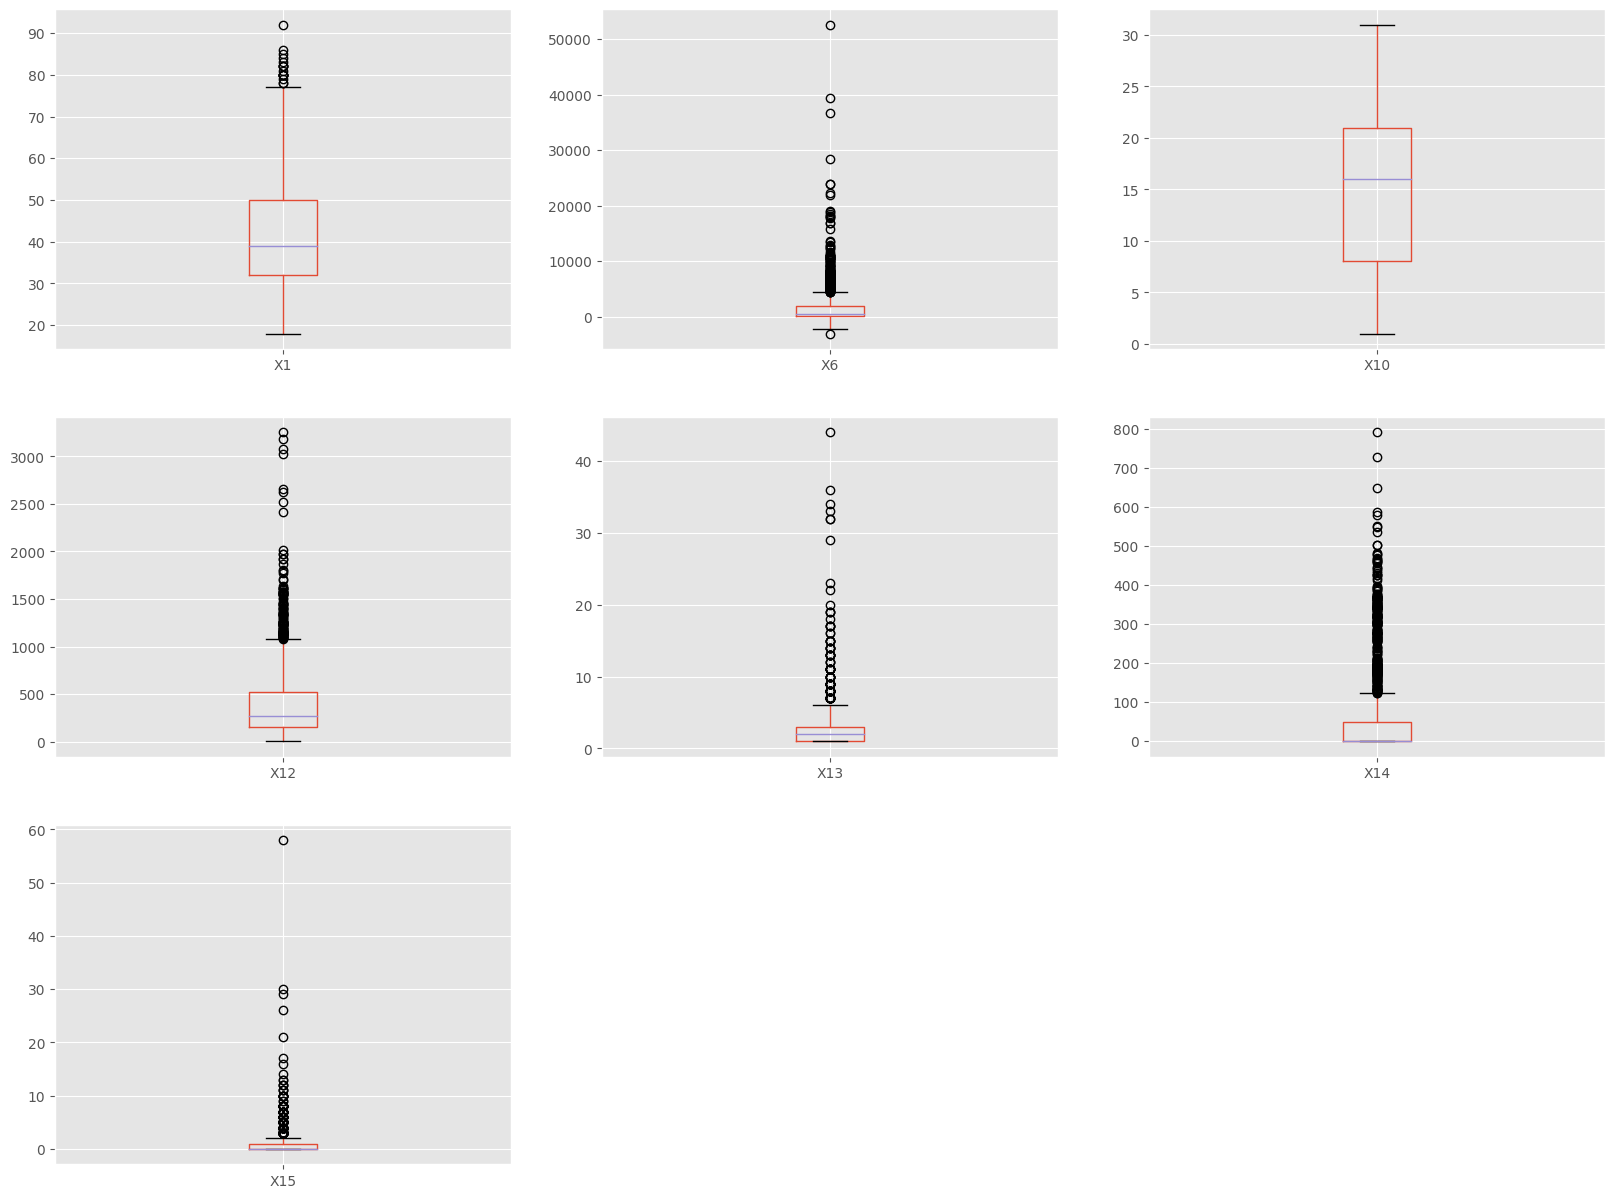

In [48]:
# For better visualization
figure, axes = plt.subplots(3,3,figsize=(20,15)) 

num_data_test.boxplot(column='X1', ax=axes[0][0])
num_data_test.boxplot(column='X6', ax=axes[0][1])
num_data_test.boxplot(column='X10', ax=axes[0][2])
num_data_test.boxplot(column='X12', ax=axes[1][0])
num_data_test.boxplot(column='X13', ax=axes[1][1])
num_data_test.boxplot(column='X14', ax=axes[1][2])
num_data_test.boxplot(column='X15', ax=axes[2][0])

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.show()

#### Remove Outliers

We choose to not remove outliers as same as in the training dataset.

### Feature Scaling

#### Correct Data Skewness

Log Transform will be performed to the test set as same as in the training set to correct the positive skewness of features 'X12', 'X13', 'X15'. While feature 'X6' will be performed cube root function to correct its skewness.

In [49]:
num_data_test[num_data<=0].count()

X1        0
X6      287
X10       0
X12       0
X13       0
X14    1572
X15    1572
dtype: int64

In [50]:
# Log Transform to features 'X13', 'X15'

num_data_test['X13'] = np.log(num_data_test['X13'])
num_data_test['X15'] = np.log(num_data_test['X15']+1)

# Cube root for feature 'X6'
num_data_test['X6'] = np.cbrt(num_data_test['X6'])

In [51]:
# Overview to data skewness
X1skewness = test.X1.skew(axis = 0, skipna = True)
X6skewness = test.X6.skew(axis = 0, skipna = True)
X12skewness = test.X12.skew(axis = 0, skipna = True)
X13skewness = test.X13.skew(axis = 0, skipna = True)
X14skewness = test.X14.skew(axis = 0, skipna = True)
X15skewness = test.X15.skew(axis = 0, skipna = True)

print('- Before Log Transform -')
print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)

X1skewness = num_data_test.X1.skew(axis = 0, skipna = True)
X6skewness = num_data_test.X6.skew(axis = 0, skipna = True)
X12skewness = num_data_test.X12.skew(axis = 0, skipna = True)
X13skewness = num_data_test.X13.skew(axis = 0, skipna = True)
X14skewness = num_data_test.X14.skew(axis = 0, skipna = True)
X15skewness = num_data_test.X15.skew(axis = 0, skipna = True)

print()
print('- After Log Transform -')
print('X1 skewness: ', X1skewness)
print('X6 skewness: ', X6skewness)
print('X12 skewness: ', X12skewness)
print('X13 skewness: ', X13skewness)
print('X14 skewness: ', X14skewness)
print('X15 skewness: ', X15skewness)

- Before Log Transform -
X1 skewness:  0.8007409782135245
X6 skewness:  5.952639140560992
X12 skewness:  2.3390679645669126
X13 skewness:  5.688760510102385
X14 skewness:  2.345799199275441
X15 skewness:  9.474594679334981

- After Log Transform -
X1 skewness:  0.8007409782135245
X6 skewness:  -0.10044354673282868
X12 skewness:  2.3390679645669126
X13 skewness:  1.0018935819734425
X14 skewness:  2.345799199275441
X15 skewness:  1.8971606268057357


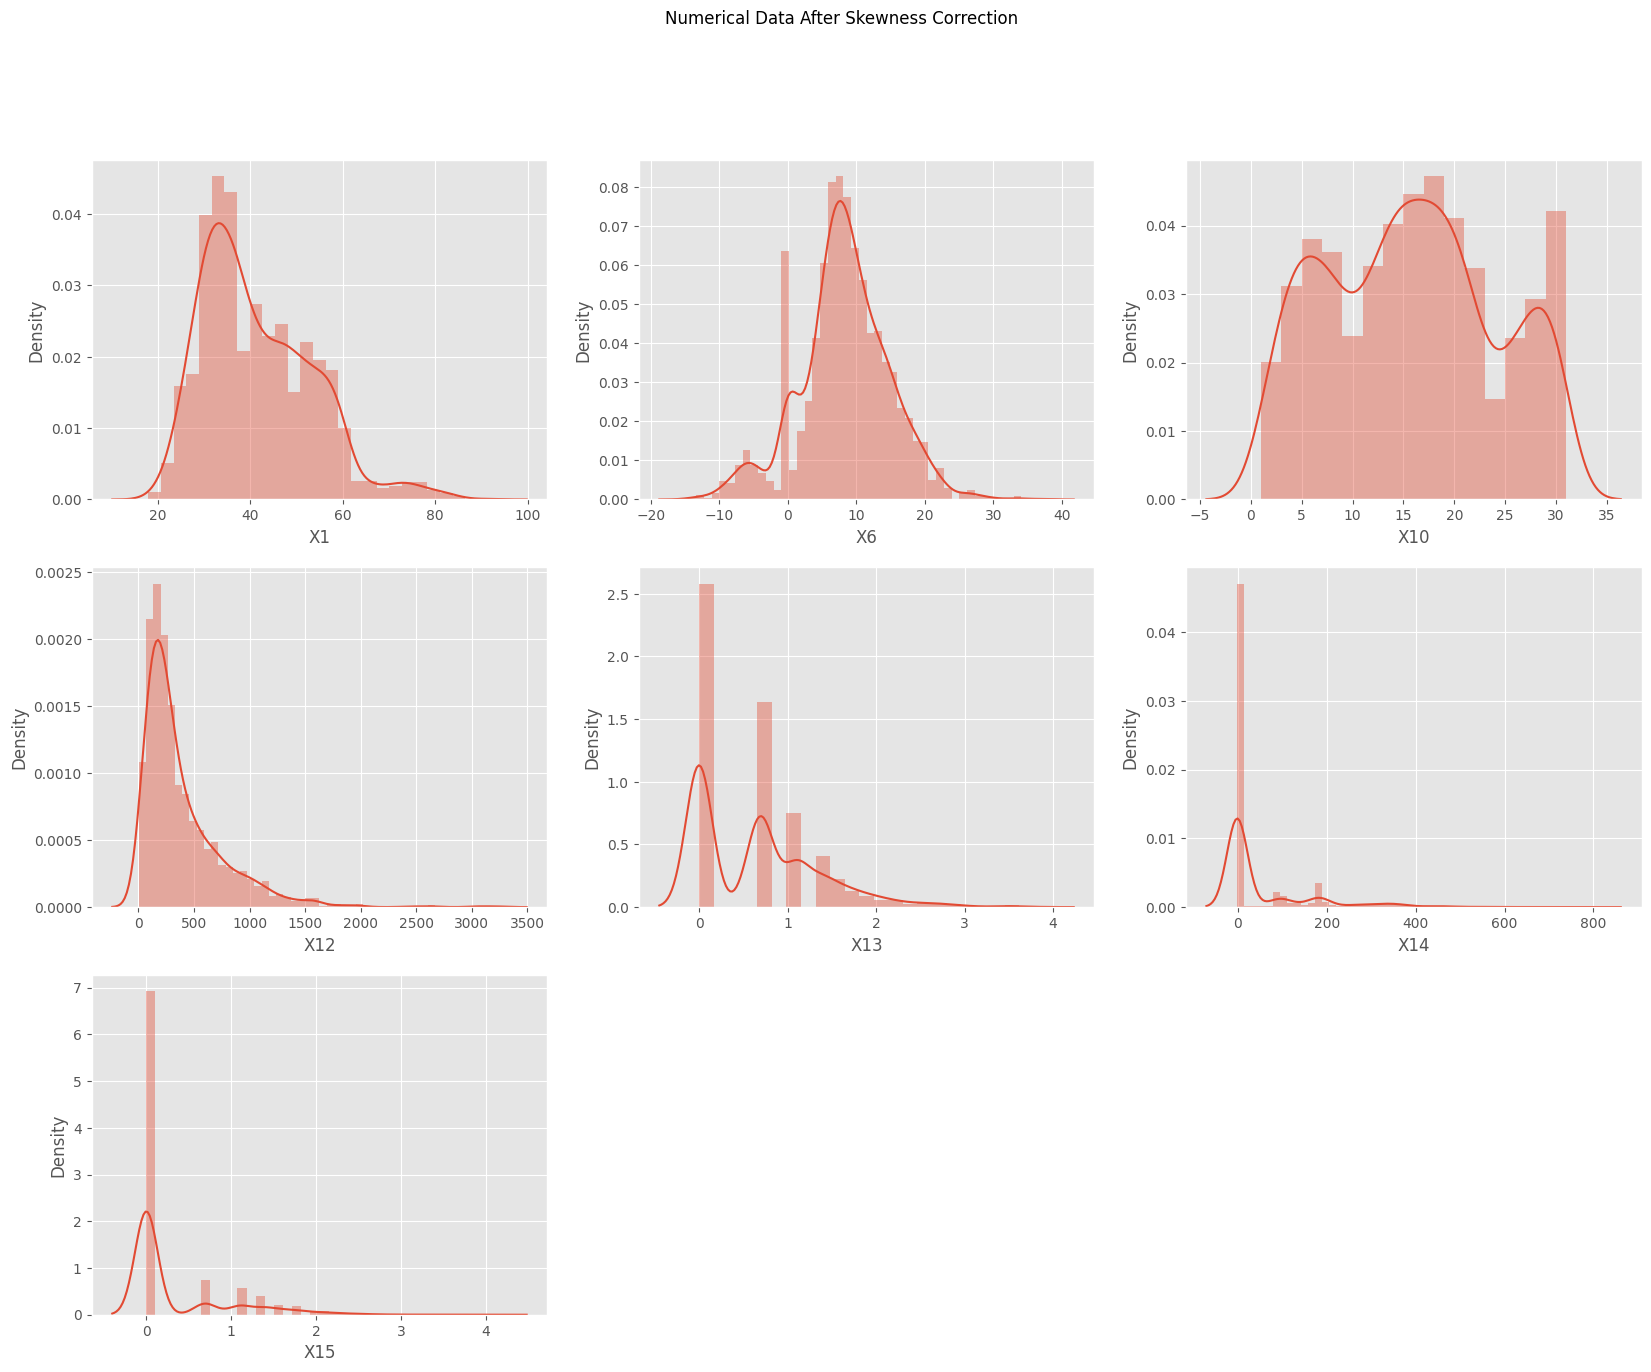

In [52]:
plt.style.use("ggplot") # Beautify purpose
figure, axes = plt.subplots(3,3,figsize=(20,15))
# plt.subplots_adjust(wspace=1, hspace=1)

sns.distplot(num_data_test.X1, ax=axes[0][0])
sns.distplot(num_data_test.X6, ax=axes[0][1])
sns.distplot(num_data_test.X10, ax=axes[0][2])
sns.distplot(num_data_test.X12, ax=axes[1][0])
sns.distplot(num_data_test.X13, ax=axes[1][1])
sns.distplot(num_data_test.X14, ax=axes[1][2])
sns.distplot(num_data_test.X15, ax=axes[2][0])

# sns.histplot(data=data, x='X1', kde=True, stat='density', linewidth=0, ax=axes[0][0])       
# sns.histplot(data=data, x='X6', kde=True, stat='density', linewidth=0, ax=axes[0][1])       
# sns.histplot(data=data, x='X10', kde=True, stat='density', linewidth=0, ax=axes[0][2])       
# sns.histplot(data=data, x='X12', kde=True, stat='density', linewidth=0, ax=axes[1][0])       
# sns.histplot(data=data, x='X13', kde=True, stat='density', linewidth=0, ax=axes[1][1])       
# sns.histplot(data=data, x='X14', kde=True, stat='density', linewidth=0, ax=axes[1][2])       
# sns.histplot(data=data, x='X15', kde=True, stat='density', linewidth=0, ax=axes[2][0]) 

# Hide unused subplot
axes[2][1].set_frame_on(False)
axes[2][1].set_axis_off()
axes[2][2].set_frame_on(False)
axes[2][2].set_axis_off()

plt.suptitle('Numerical Data After Skewness Correction')
plt.show()

#### Standardization

In [53]:
for i in num_data_test.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(num_data_test[[i]])
    
    # transform the training data column
    num_data_test[i] = scale.transform(num_data_test[[i]])

In [54]:
print('Mean:\n',num_data_test.mean(axis = 0))
print('\nStandard Deviation:\n',num_data_test.std (axis = 0))

Mean:
 X1     2.908826e-16
X6    -3.290793e-16
X10   -1.032570e-16
X12    8.730676e-17
X13   -2.014771e-17
X14    5.372724e-17
X15    6.044314e-17
dtype: float64

Standard Deviation:
 X1     1.000236
X6     1.000236
X10    1.000236
X12    1.000236
X13    1.000236
X14    1.000236
X15    1.000236
dtype: float64


### Finalize Training Dataset And Testing Dataset

In [55]:
print("Shape of training dataset: {}".format(num_data_train.shape))
print("Shape of testing dataset: {}".format(num_data_test.shape))

Shape of training dataset: (8462, 7)
Shape of testing dataset: (2116, 7)


## Data Preprocessing - Categorical Data (Train Dataset)

### Find Categorical Features

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      10578 non-null  int64 
 1   X2      10578 non-null  object
 2   X3      10578 non-null  object
 3   X4      10578 non-null  object
 4   X5      10578 non-null  object
 5   X6      10578 non-null  int64 
 6   X7      10578 non-null  object
 7   X8      10578 non-null  object
 8   X9      10578 non-null  object
 9   X10     10578 non-null  int64 
 10  X11     10578 non-null  object
 11  X12     10578 non-null  int64 
 12  X13     10578 non-null  int64 
 13  X14     10578 non-null  int64 
 14  X15     10578 non-null  int64 
 15  X16     10578 non-null  object
 16  y       10578 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [57]:
cat_data = data.select_dtypes(include= object)
# cat_data.drop('y', axis=1, inplace=True)
cat_data.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
0,blue-collar,single,primary,no,yes,no,cellular,may,unknown,no
1,technician,married,secondary,no,no,yes,cellular,feb,unknown,no
2,housemaid,divorced,secondary,no,no,no,cellular,aug,failure,no
3,technician,married,secondary,no,yes,no,cellular,jul,unknown,no
4,unemployed,married,secondary,no,no,no,telephone,apr,unknown,no


In [58]:
cat_data.nunique()

X2     12
X3      3
X4      4
X5      2
X7      2
X8      2
X9      3
X11    12
X16     4
y       2
dtype: int64

In [59]:
cat_data_train = train.select_dtypes(include= object)
# cat_data_train.drop('y', axis=1, inplace=True)
cat_data_train.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
9804,technician,single,secondary,no,no,no,cellular,may,success,yes
7268,blue-collar,married,primary,no,yes,no,cellular,apr,unknown,yes
5352,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
4180,management,single,tertiary,no,no,no,cellular,aug,unknown,no
7884,services,single,secondary,no,yes,no,cellular,may,failure,yes


### Data Format Correction

We change the labels of output vector 'y' from \['yes' and 'no'\] into \[True and False\] in bool type, where True indicate 'yes' and False indicate 'no'.

In [60]:
cat_data_train['y'][cat_data_train['y']=='yes'] = True
cat_data_train['y'][cat_data_train['y']=='no'] = False
cat_data_train['y'] = cat_data_train['y'].astype('bool')
cat_data_train.head()

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
9804,technician,single,secondary,no,no,no,cellular,may,success,True
7268,blue-collar,married,primary,no,yes,no,cellular,apr,unknown,True
5352,technician,married,secondary,no,yes,no,unknown,may,unknown,True
4180,management,single,tertiary,no,no,no,cellular,aug,unknown,False
7884,services,single,secondary,no,yes,no,cellular,may,failure,True


### Missing Value / Unknown Value

Although there is no missing value in this dataset, based on below result, we can observe that the features 'X2', 'X4', 'X9', and 'X16' consist of unknown value and below shows the number of unknown records in these features.

In [61]:
cat_data_train[cat_data_train=='unknown'].count()

X2       54
X3        0
X4      375
X5        0
X7        0
X8        0
X9     1746
X11       0
X16    6278
y         0
dtype: int64

In [62]:
cat_data_train[cat_data_train=='unknown'].count()/len(cat_data_train)*100

X2      0.638147
X3      0.000000
X4      4.431576
X5      0.000000
X7      0.000000
X8      0.000000
X9     20.633420
X11     0.000000
X16    74.190499
y       0.000000
dtype: float64

However, based on the assignment description, we assume all these unknown records are part of the data pattern and do not handle the missing value in this dataset. Therefore, we assume no missing value exists in this dataset.

### Feature Selection

We discover the feature 'X16' consist of too many unknown values that is more than half of the total record. However, we decided to keep the feature for now to ensure enough features for model training and we assume this is part of the acceptable data pattern.

In [63]:
# cat_data_train = cat_data_train.drop(['X16'], axis = 1)
# cat_data_train.head(5)

### Handling Categorical Features

Before handling the categorical attributes, the number of category of each feature is identified.

In [64]:
# Number of different values per category
X2_cat = pd.get_dummies(cat_data_train["X2"]).shape
X3_cat = pd.get_dummies(cat_data_train["X3"]).shape
X4_cat = pd.get_dummies(cat_data_train["X4"]).shape
X5_cat = pd.get_dummies(cat_data_train["X5"]).shape
X7_cat = pd.get_dummies(cat_data_train["X7"]).shape
X8_cat = pd.get_dummies(cat_data_train["X8"]).shape
X9_cat = pd.get_dummies(cat_data_train["X9"]).shape
X11_cat = pd.get_dummies(cat_data_train["X11"]).shape
X16_cat = pd.get_dummies(cat_data_train["X16"]).shape

print("Number of category in X2: %s"%(X2_cat[1]))
print("Number of category in X3: %s"%(X3_cat[1]))
print("Number of category in X4: %s"%(X4_cat[1]))
print("Number of category in X5: %s"%(X5_cat[1]))
print("Number of category in X7: %s"%(X7_cat[1]))
print("Number of category in X8: %s"%(X8_cat[1]))
print("Number of category in X9: %s"%(X9_cat[1]))
print("Number of category in X11: %s"%(X11_cat[1]))
print("Number of category in X16: %s"%(X16_cat[1]))

Number of category in X2: 12
Number of category in X3: 3
Number of category in X4: 4
Number of category in X5: 2
Number of category in X7: 2
Number of category in X8: 2
Number of category in X9: 3
Number of category in X11: 12
Number of category in X16: 4


Due to almost all categorical features are nominal features, we can apply One Hot Encoding to them. However, we apply Ordinal Encoding to the feature 'X4' since it contains ordinal data category of primary, secondary, and tertiary. Although it also has value of 'unknown' that is not a ranking, we still consider apply ordinal encoding to it to keep its order and data pattern.

In [65]:
cat_data_train['X4'].value_counts()

secondary    4110
tertiary     2828
primary      1149
unknown       375
Name: X4, dtype: int64

#### One Hot Encoding

Generate dummies variable to apply OneHotEncoder to the all categorical columns.

In [66]:
# One Hot Encoding
columns = ['X2', 'X3', 'X5', 'X7', 'X8', 'X9', 'X11', 'X16']

dummies = pd.get_dummies(cat_data_train[columns])
original_cat_data_train = cat_data_train
cat_data_train = pd.concat([cat_data_train.drop(columns = columns), dummies], axis = 1)

# Ordinal Encoding
columns = ['X4']

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_data_train['X4'] = ordinal_encoder.fit_transform(cat_data_train[['X4']])
cat_data_train.head(5)

,X4,y,X2_admin.,X2_blue-collar,X2_entrepreneur,X2_housemaid,X2_management,X2_retired,X2_self-employed,X2_services,...,X11_jun,X11_mar,X11_may,X11_nov,X11_oct,X11_sep,X16_failure,X16_other,X16_success,X16_unknown
9804,1.0,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7268,0.0,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5352,1.0,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4180,2.0,False,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7884,1.0,True,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [67]:
print("Number of categorical features before applied OneHotEncoder & OrdinalEncoder: %s"%(original_cat_data_train.shape[1]))
print("Number of categorical features after applied OneHotEncoder & OrdinalEncoder: %s"%(cat_data_train.shape[1]))

Number of categorical features before applied OneHotEncoder & OrdinalEncoder: 10
Number of categorical features after applied OneHotEncoder & OrdinalEncoder: 42


In [68]:
cat_data_train

,X4,y,X2_admin.,X2_blue-collar,X2_entrepreneur,X2_housemaid,X2_management,X2_retired,X2_self-employed,X2_services,...,X11_jun,X11_mar,X11_may,X11_nov,X11_oct,X11_sep,X16_failure,X16_other,X16_success,X16_unknown
9804,1.0,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7268,0.0,True,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5352,1.0,True,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4180,2.0,False,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7884,1.0,True,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,1.0,False,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2514,2.0,False,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6637,0.0,True,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2575,3.0,False,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Feature Selection (Cont.)

#### Feature Subset Selection

Check and identify the pairwise correlation of each categorical feature pair. Based on the result, the feature subset will be decided to whether drop or keep the feature subset which has high pairwise correlation.

We consider a feature subset is highly correlated if it contributes correlation higher than 0.80.

In [69]:
cat_data_train.corr()

,X4,y,X2_admin.,X2_blue-collar,X2_entrepreneur,X2_housemaid,X2_management,X2_retired,X2_self-employed,X2_services,...,X11_jun,X11_mar,X11_may,X11_nov,X11_oct,X11_sep,X16_failure,X16_other,X16_success,X16_unknown
X4,1.000000,0.097923,-0.062821,-0.333820,0.026873,-0.104202,0.424912,-0.125353,0.076867,-0.081180,...,-0.021360,0.034528,-0.094722,0.009377,0.029307,0.038881,0.009929,-0.001461,0.066939,-0.052135
y,0.097923,1.000000,0.000012,-0.118444,-0.026884,-0.022369,0.055953,0.106308,-0.002525,-0.048166,...,-0.025765,0.138961,-0.168892,-0.019649,0.127853,0.129569,0.007403,0.054990,0.282527,-0.224362
X2_admin.,-0.062821,0.000012,1.000000,-0.173130,-0.059805,-0.057957,-0.197565,-0.101632,-0.068499,-0.108978,...,0.002825,0.005210,0.039818,-0.011972,0.000426,0.000472,0.025761,0.008239,0.002217,-0.024113
X2_blue-collar,-0.333820,-0.118444,-0.173130,1.000000,-0.076912,-0.074536,-0.254080,-0.130705,-0.088093,-0.140152,...,0.028634,-0.057180,0.167824,-0.037343,-0.061047,-0.055427,-0.011075,-0.019017,-0.074136,0.067684
X2_entrepreneur,0.026873,-0.026884,-0.059805,-0.076912,1.000000,-0.025747,-0.087767,-0.045150,-0.030430,-0.048413,...,0.025865,-0.021735,-0.003294,0.041968,-0.011976,-0.010950,0.000485,-0.021629,-0.036507,0.034907
X2_housemaid,-0.104202,-0.022369,-0.057957,-0.074536,-0.025747,1.000000,-0.085055,-0.043755,-0.029490,-0.046917,...,0.052199,-0.006222,-0.043621,-0.004515,0.014095,-0.014058,-0.015299,-0.012779,-0.013753,0.026579
X2_management,0.424912,0.055953,-0.197565,-0.254080,-0.087767,-0.085055,1.000000,-0.149152,-0.100526,-0.159933,...,-0.030281,0.043386,-0.082922,0.016335,0.021582,0.046028,0.003280,0.016661,0.040885,-0.038238
X2_retired,-0.125353,0.106308,-0.101632,-0.130705,-0.045150,-0.043755,-0.149152,1.000000,-0.051713,-0.082273,...,-0.002075,0.045150,-0.090307,-0.024636,0.063354,0.076123,-0.020684,0.007030,0.069935,-0.036079
X2_self-employed,0.076867,-0.002525,-0.068499,-0.088093,-0.030430,-0.029490,-0.100526,-0.051713,1.000000,-0.055451,...,0.001277,0.011154,-0.029422,0.043388,-0.015485,-0.021058,0.007721,-0.003547,-0.009125,0.002331
X2_services,-0.081180,-0.048166,-0.108978,-0.140152,-0.048413,-0.046917,-0.159933,-0.082273,-0.055451,1.000000,...,-0.000768,-0.012577,0.078885,-0.008412,-0.034873,-0.018753,-0.000907,-0.001273,-0.022888,0.016873


In [70]:
# 1.0: Self feature subset of x=y

cat_data_train.corr()[(cat_data_train.corr()>0.8) & (cat_data_train.corr()!=1.0)].count().sum()

0

In conclusion, there is no feature subset with high correlation and need to be removed.

## Data Preprocessing - Categorical Data (Test Dataset)

In [71]:
cat_data_test = test.select_dtypes(include= object)
# cat_data_test.drop('y', axis=1, inplace=True)
cat_data_test.head(5)

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
10264,self-employed,single,tertiary,no,no,no,cellular,aug,success,yes
3751,blue-collar,married,secondary,no,no,no,unknown,jul,unknown,no
9827,admin.,married,tertiary,no,no,no,cellular,may,other,yes
2195,blue-collar,married,secondary,no,yes,yes,cellular,may,unknown,no
6997,unknown,single,tertiary,no,no,no,cellular,mar,unknown,yes


### Data Format Correction

In [72]:
cat_data_test['y'][cat_data_test['y']=='yes'] = True
cat_data_test['y'][cat_data_test['y']=='no'] = False
cat_data_test['y'] = cat_data_test['y'].astype('bool')
cat_data_test.head()

,X2,X3,X4,X5,X7,X8,X9,X11,X16,y
10264,self-employed,single,tertiary,no,no,no,cellular,aug,success,True
3751,blue-collar,married,secondary,no,no,no,unknown,jul,unknown,False
9827,admin.,married,tertiary,no,no,no,cellular,may,other,True
2195,blue-collar,married,secondary,no,yes,yes,cellular,may,unknown,False
6997,unknown,single,tertiary,no,no,no,cellular,mar,unknown,True


### Feature Selection

No feature was dropped in the train set.

In [73]:
# cat_data_test = cat_data_test.drop(['X16'], axis = 1)
# cat_data_test.head(5)

### Handling Categorical Features

In [74]:
# Number of different values per category
X2_cat = pd.get_dummies(cat_data_test["X2"]).shape
X3_cat = pd.get_dummies(cat_data_test["X3"]).shape
X4_cat = pd.get_dummies(cat_data_test["X4"]).shape
X5_cat = pd.get_dummies(cat_data_test["X5"]).shape
X7_cat = pd.get_dummies(cat_data_test["X7"]).shape
X8_cat = pd.get_dummies(cat_data_test["X8"]).shape
X9_cat = pd.get_dummies(cat_data_test["X9"]).shape
X11_cat = pd.get_dummies(cat_data_test["X11"]).shape
X11_cat = pd.get_dummies(cat_data_test["X16"]).shape

print("Number of category in X2: %s"%(X2_cat[1]))
print("Number of category in X3: %s"%(X3_cat[1]))
print("Number of category in X4: %s"%(X4_cat[1]))
print("Number of category in X5: %s"%(X5_cat[1]))
print("Number of category in X7: %s"%(X7_cat[1]))
print("Number of category in X8: %s"%(X8_cat[1]))
print("Number of category in X9: %s"%(X9_cat[1]))
print("Number of category in X11: %s"%(X11_cat[1]))
print("Number of category in X16: %s"%(X16_cat[1]))

Number of category in X2: 12
Number of category in X3: 3
Number of category in X4: 4
Number of category in X5: 2
Number of category in X7: 2
Number of category in X8: 2
Number of category in X9: 3
Number of category in X11: 4
Number of category in X16: 4


#### One Hot Encoding

In [75]:
# One Hot Encoding
columns = ['X2', 'X3', 'X5', 'X7', 'X8', 'X9', 'X11', 'X16']
dummies = pd.get_dummies(cat_data_test[columns])
original_cat_data_test = cat_data_test
cat_data_test = pd.concat([cat_data_test.drop(columns = columns), dummies], axis = 1)

# Ordinal Encoding
columns = ['X4']

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
cat_data_test['X4'] = ordinal_encoder.fit_transform(cat_data_test[['X4']])
cat_data_test.head(5)

,X4,y,X2_admin.,X2_blue-collar,X2_entrepreneur,X2_housemaid,X2_management,X2_retired,X2_self-employed,X2_services,...,X11_jun,X11_mar,X11_may,X11_nov,X11_oct,X11_sep,X16_failure,X16_other,X16_success,X16_unknown
10264,2.0,True,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3751,1.0,False,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9827,2.0,True,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2195,1.0,False,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6997,2.0,True,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [76]:
print("Number of categorical features before applied OneHotEncoder & OrdinalEncoder: %s"%(original_cat_data_test.shape[1]))
print("Number of categorical features after applied OneHotEncoder & OrdinalEncoder: %s"%(cat_data_test.shape[1]))

Number of categorical features before applied OneHotEncoder & OrdinalEncoder: 10
Number of categorical features after applied OneHotEncoder & OrdinalEncoder: 42


### Feature Selection (Cont.)

#### Feature Subset Selection

As no feature subset is dropped in the training set, no feature subset is removed in the test set as well.

### Finalize Training Dataset And Testing Dataset

In [77]:
print("Shape of training dataset: {}".format(cat_data_train.shape))
print("Shape of testing dataset: {}".format(cat_data_test.shape))

Shape of training dataset: (8462, 42)
Shape of testing dataset: (2116, 42)


---

## Combine Numerical and Categorical Features

In [78]:
train = pd.merge(num_data_train, cat_data_train, left_index=True, right_index=True)
test = pd.merge(num_data_test, cat_data_test, left_index=True, right_index=True)

X_train = train.drop(['y'], axis = 1)
y_train = train['y']

X_test = test.drop(['y'], axis = 1)
y_test = test['y']

## Summary of Preprocessed Data

In [79]:
print('\nOriginal Dataset')
print('Full Dataset (Without undersampling):', ori_data.shape)

print('\nOriginal Dataset')
print('Full Dataset (With undersampling):', data.shape)

print('\nPreprocessed and Combined Training Set')
print('X_train:', X_train.shape)
print('y_train   :', y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test:', X_test.shape)
print('y_test   :', y_test.shape)


Original Dataset
Full Dataset (Without undersampling): (45211, 17)

Original Dataset
Full Dataset (With undersampling): (10578, 17)

Preprocessed and Combined Training Set
X_train: (8462, 48)
y_train   : (8462,)

Preprocessed and Combined Testing Set
X_test: (2116, 48)
y_test   : (2116,)


---

# Declare Functions

Few functions are declared before the model training step to extract common codes used for both model training and cross validation process.

In [80]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, plot_roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

# Declaration of performance indicators used for model evaluation
# Indicators: Accuracy, Precision, Recall, F1 Score

scores = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time", "Score Time", "Accuracy", "Precision", "Recall", "F1 score"])

# Declaration of models used for model training
# Models: Logistic Regression, Random Forest Classifier, KNN CLassifier, Stochastic Gradient Descent
clf = ["Logistic Regression", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent"]

# Store the predictions for each classifiers
y_pred_arr = {} 

# An overview of training accuracy
overview_acc = pd.DataFrame(columns=["Accuracy"]) 

## Training Function

In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    overview_acc.loc[clf[i]] = round(accuracy_score(y_pred, y_train)*100,4)  # Store trained accuracy to list

## Cross Validation Function

In [82]:
def cross_val(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    report = pd.DataFrame(cross_validate(model, x, y, cv=5, scoring=scores))
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values] # Store cross validate accuracy to list

---

## Model Performance Evaluation Functions

Also, few functions are declared to evaluate the performance of each model built and trained.

### Classification Report Function

In [83]:
from sklearn.metrics import classification_report

def classifyReport(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    y_pred = cross_val_predict(model, x, y, cv=5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y, y_pred_arr[clf[i]]))
    print()

### Confusion Matrix Function

In [84]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(model, i, x = X_train, y = y_train):
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n")

### Cross Validation Summary Graph

In [85]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar(figsize=(15,5))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [86]:
def performance_sum():    
    #list of scores
    precision_score = [float(i) for i in overview['Precision']]
    recall_score    = [float(i) for i in overview['Recall']]
    f1_score        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_score, recall_score, f1_score], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar(figsize=(15,5))
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

### Precision-Recall Curve

In [87]:
def plot_precision_vs_recall(model, i, x = X_train, y = y_train):   
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_arr[clf[i]])
    ax.plot(recalls, precisions, linewidth=3, label=clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

### ROC Curve

In [88]:
# def plot_roc_curve_(model, ax, x = X_train, y = y_train):   
#     plot_roc_curve(model, x, y, ax=ax)
#     ax.plot([0,1], [0, 1], 'k--')
    
def plot_roc_curve(i, y = y_train):
    fpr, tpr, treshold = roc_curve(y, y_pred_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

---

# Model Training

**4 algorithms** are applied to train 4 models for classification purpose

1. Logistic Regression
2. Random Forest Classifier
3. KNN Classifier
4. Stochastic Gradient Descent (SGD)


### Prepare Model

In [89]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

#Model 2 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)

#Model 3 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=20)

#Model 4 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

In [90]:
X_train

,X1,X6,X10,X12,X13,X14,X15,X4,X2_admin.,X2_blue-collar,...,X11_jun,X11_mar,X11_may,X11_nov,X11_oct,X11_sep,X16_failure,X16_other,X16_success,X16_unknown
9804,-1.431975,0.025774,-0.421907,1.113083,-0.932903,1.177176,1.265642,1.0,0,0,...,0,0,1,0,0,0,0,0,1,0
7268,-0.681074,-1.014353,0.170280,1.817888,0.093375,-0.486514,-0.528782,0.0,0,1,...,0,0,0,0,0,0,0,0,0,1
5352,0.153260,1.023389,-0.303470,3.871891,0.093375,-0.486514,-0.528782,1.0,0,0,...,0,0,1,0,0,0,0,0,0,1
4180,-0.430774,-0.820342,1.591529,-0.014605,1.119653,-0.486514,-0.528782,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
7884,1.237895,-1.808962,-0.066595,-0.184333,-0.932903,2.868140,1.265642,1.0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,-0.347340,-0.230897,-1.132532,-0.564065,-0.932903,-0.486514,-0.528782,1.0,1,0,...,0,0,0,0,0,0,0,0,0,1
2514,1.404762,0.067353,1.117780,0.008409,0.693709,-0.486514,-0.528782,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
6637,0.570428,1.711108,0.644030,0.672940,0.093375,-0.486514,-0.528782,0.0,0,0,...,0,0,0,1,0,0,0,0,0,1
2575,0.653861,0.454003,0.288718,-0.215978,-0.932903,-0.486514,-0.528782,3.0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Train Model

In [91]:
for i, a in enumerate([model1, model2, model3, model4]):
    train(a, i)

### Perform Cross Validation

In [92]:
for i, a in enumerate([model1, model2, model3, model4]):
    cross_val(a, i)

## Comparision Of Model's Accuracy With And Without Cross Validation

### Before Performing Cross Validation

In [93]:
overview_acc

,Accuracy
Logistic Regression,83.7863
Random Forest Classifier,100.0000
KNN Classifier,83.8572
Stochastic Gradient Descent,83.3373


Based on the result above, we can predict the Random Forest Classifier model probably having overfitting issue due to the too high accuracy that fits the training set almost perfectly.

Hence, we then perform k-fold cross validation on all algorithms trained to resolve the overfitting issues.

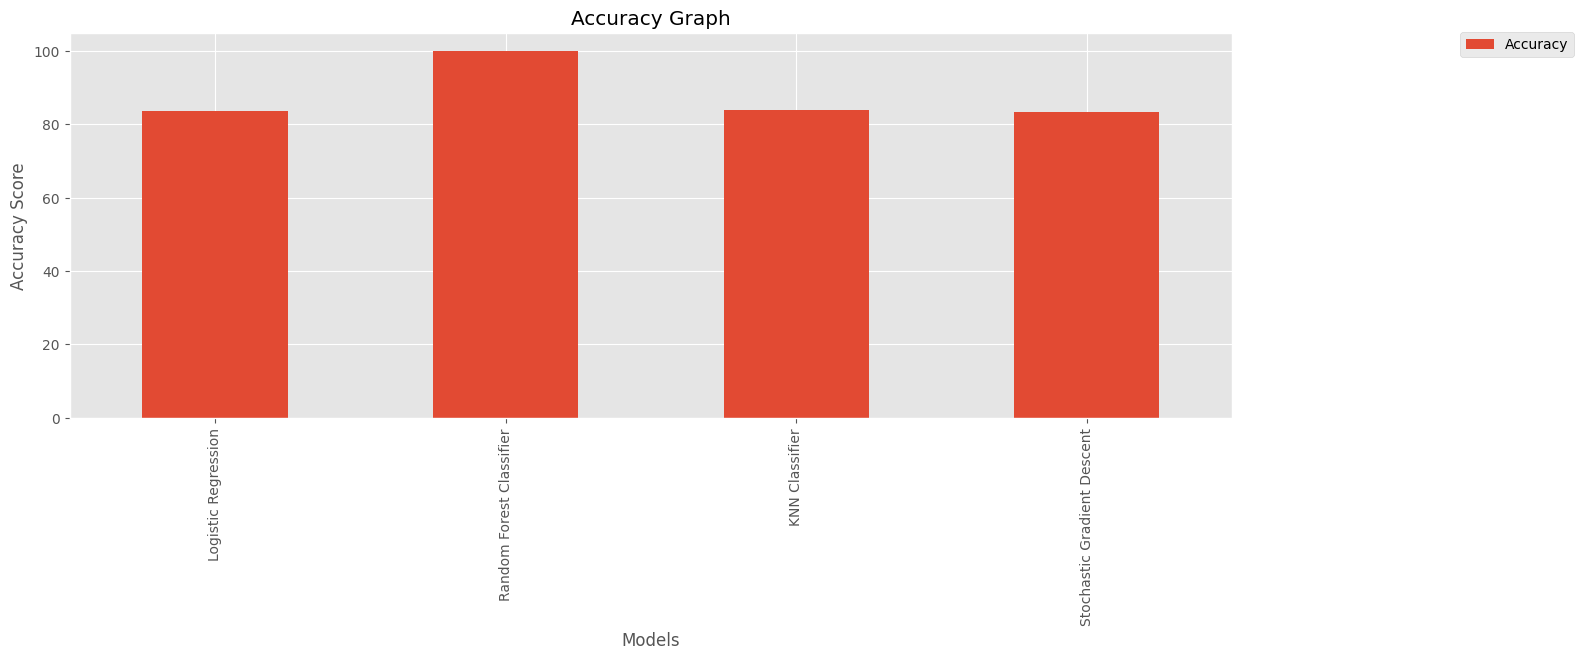

In [94]:
pd.DataFrame([float(i) for i in overview_acc.Accuracy], index=clf, columns=['Accuracy']).plot.bar(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

### After Performing Cross Validation

In [95]:
pd.DataFrame(overview['Accuracy'])

,Accuracy
Logistic Regression,0.8353
Random Forest Classifier,0.8574
KNN Classifier,0.8187
Stochastic Gradient Descent,0.8119


The accuracy of each algorithm except SGD classifier, and especially Random Forest Classifier after performed the k-fold cross validation had decreased to address the overfitting problem occurred.

Fine tune will then be processed since the overall performance of all models had decreased to improve them from different evaluation metrics.

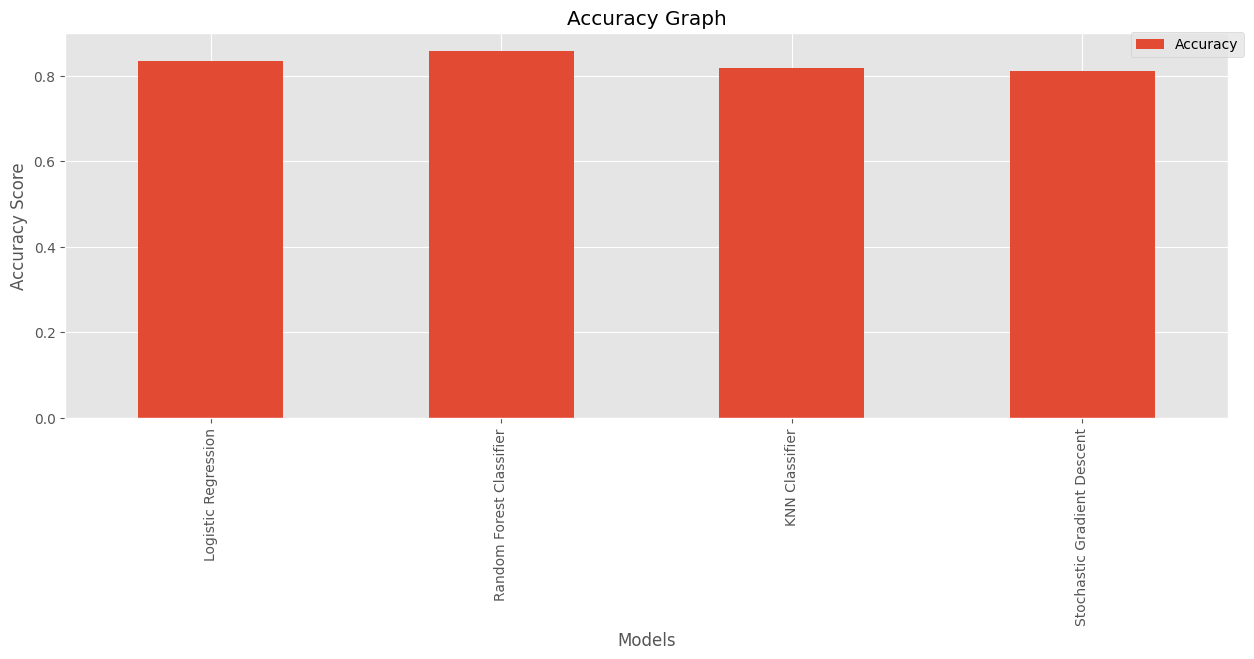

In [96]:
pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar(figsize=(15,5))
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

## Classification Report

In [97]:
for i, a in enumerate([model1, model2, model3, model4]):
    classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

       False       0.83      0.85      0.84      4248
        True       0.84      0.82      0.83      4214

    accuracy                           0.84      8462
   macro avg       0.84      0.84      0.84      8462
weighted avg       0.84      0.84      0.84      8462


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.88      0.83      0.85      4248
        True       0.84      0.88      0.86      4214

    accuracy                           0.86      8462
   macro avg       0.86      0.86      0.86      8462
weighted avg       0.86      0.86      0.86      8462


KNN Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.79      0.87      0.83      4248
        True       0.85      0.77      0.81      4214

    accuracy                           0.8

## Confusion Matrix

In [98]:
for i, a in enumerate([model1, model2, model3, model4]):
    confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[3606  642]
 [ 752 3462]]

Accuracy: 0.8352635310801229
TN, FP, FN, TP :  3606 642 752 3462


Random Forest Classifier
Confusion Matrix:
[[3527  721]
 [ 486 3728]]

Accuracy: 0.857362325691326
TN, FP, FN, TP :  3527 721 486 3728


KNN Classifier
Confusion Matrix:
[[3689  559]
 [ 975 3239]]

Accuracy: 0.8187189789647837
TN, FP, FN, TP :  3689 559 975 3239


Stochastic Gradient Descent
Confusion Matrix:
[[3695  553]
 [1039 3175]]

Accuracy: 0.8118648073741432
TN, FP, FN, TP :  3695 553 1039 3175




We can observe that Random Forest Classifier predict majority of TP and have highest performance for now.

## Overall Performance

Below shows the overall accuracy graph and four performance evaluation parameters of all four models had trained.

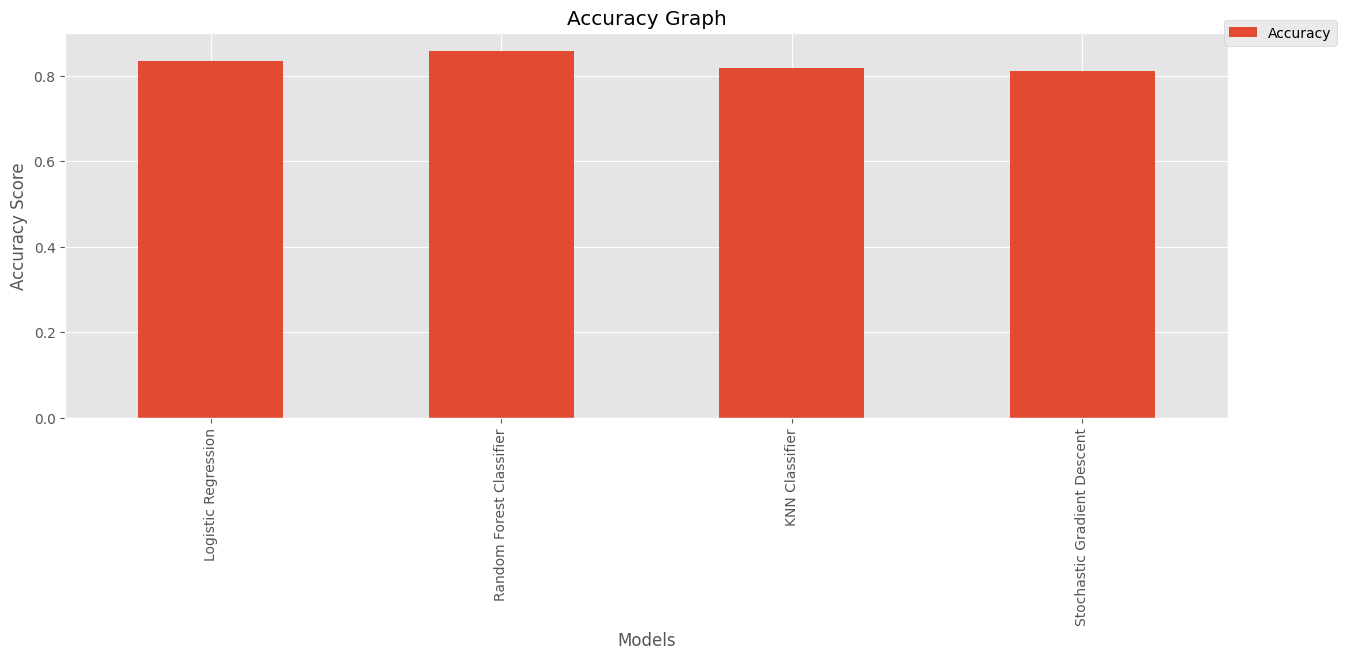

In [99]:
cv_sum()

In [100]:
overview

,Fit Time,Score Time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.1680,0.0106,0.8353,0.8356,0.8352,0.8352
Random Forest Classifier,1.6241,0.0967,0.8574,0.8585,0.8575,0.8573
KNN Classifier,0.0116,0.2023,0.8187,0.8219,0.8185,0.8182
Stochastic Gradient Descent,0.1161,0.0111,0.8119,0.8190,0.8116,0.8105


From the result, we can see that all four models produce similar accuracy and performance of more than 80%. Among them, Random Forest Classifier is considered as the best model due to it has the highest Accuracy of 85.96% and F1 Score of 85.95%.

We prefer Random Forest Classifier than other models as we prefer a model with equally good precision and recall in this problem.

### Overall Performance Graph

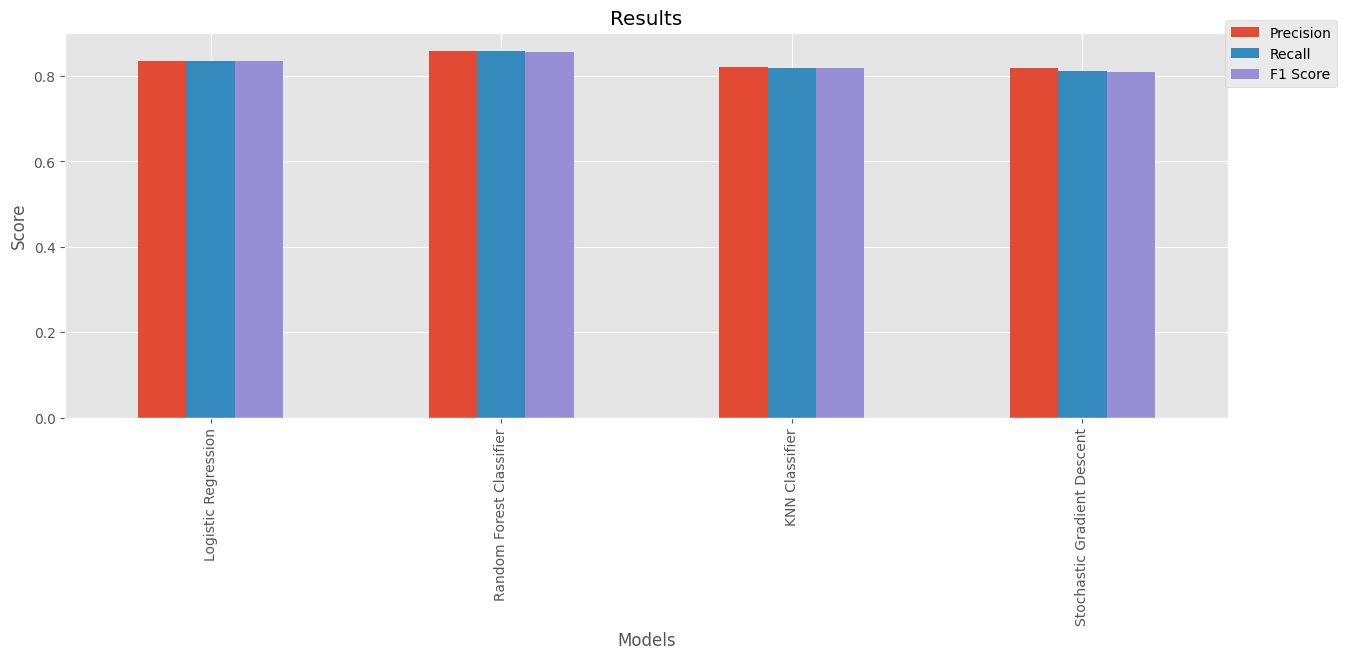

In [101]:
performance_sum()

Based on the graph above, we can see that the Random Forest Classifier has the highest overall performance among all four algorithms as trained.

### Precision-Recall Curve

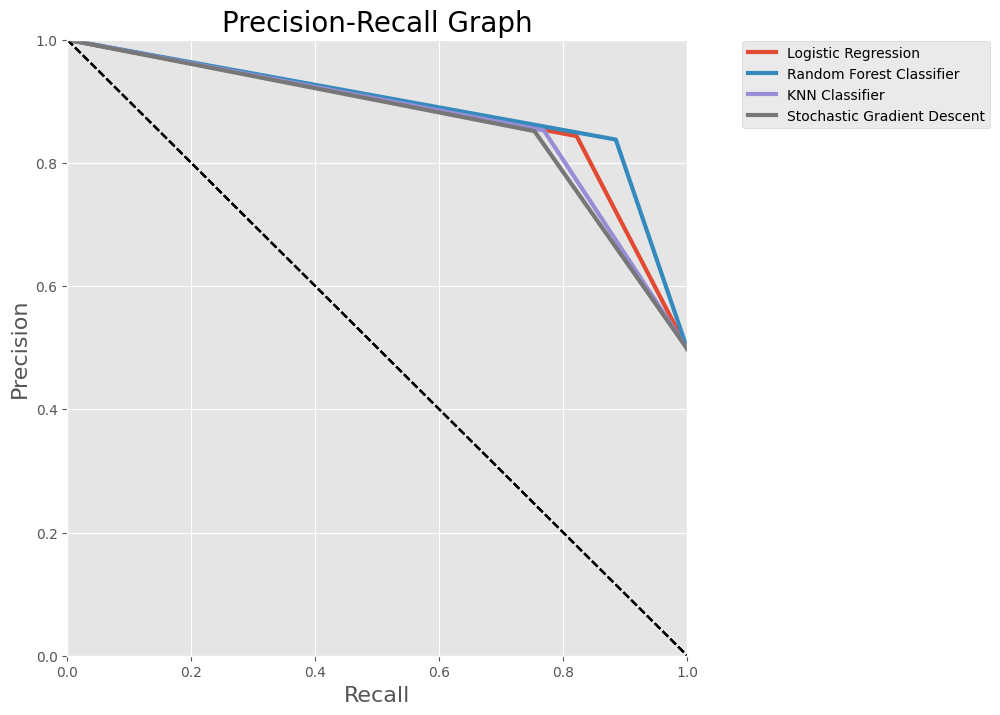

In [102]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(4):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

According to the PR Curve, Random Forest Classifier is the model that closest to the top right corner while the KNN Classifier is most far away from the top right corner.

### ROC Curve

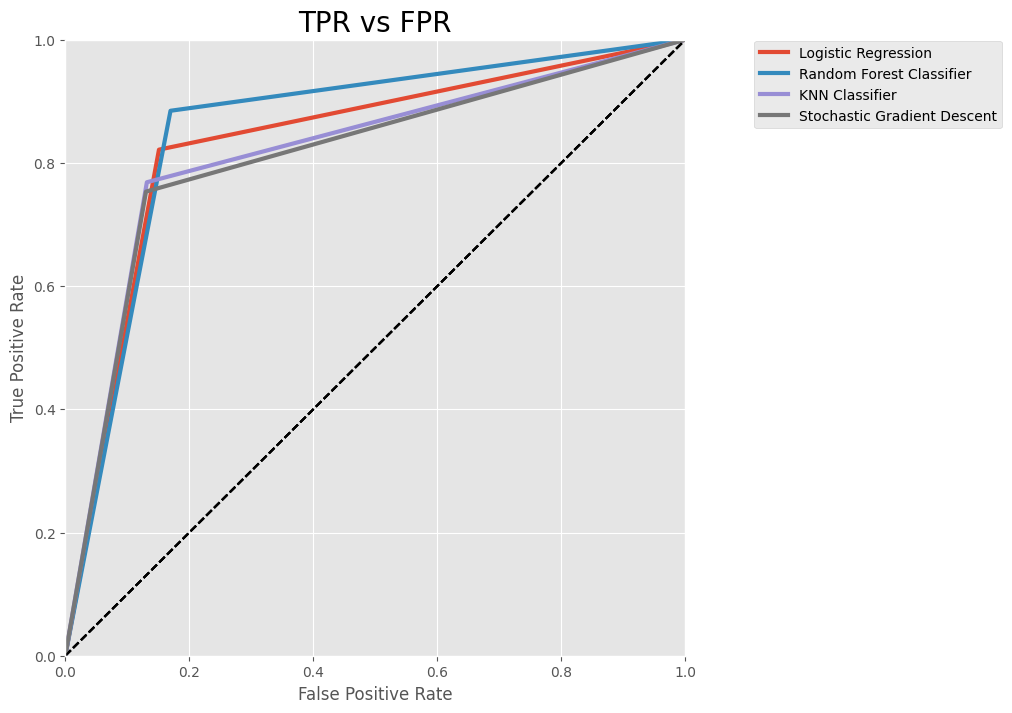

In [103]:
fig, ax = plt.subplots(figsize=(8,8))

# for i in [model1, model2, model3, model4]:
#     plot_roc_curve_(i, ax)

for i in range(4):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

According to the ROC Curves, Random Forest Classifier is the model that closest to the top left corner while KNN Classifier is most far away from the top left corner.

### AUC Score

In [104]:
roc_auc_score_arr = [roc_auc_score(y_train, y_pred_arr[clf[i]]) for i in range(4)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.835209
Random Forest Classifier,0.857472
KNN Classifier,0.818519
Stochastic Gradient Descent,0.811631


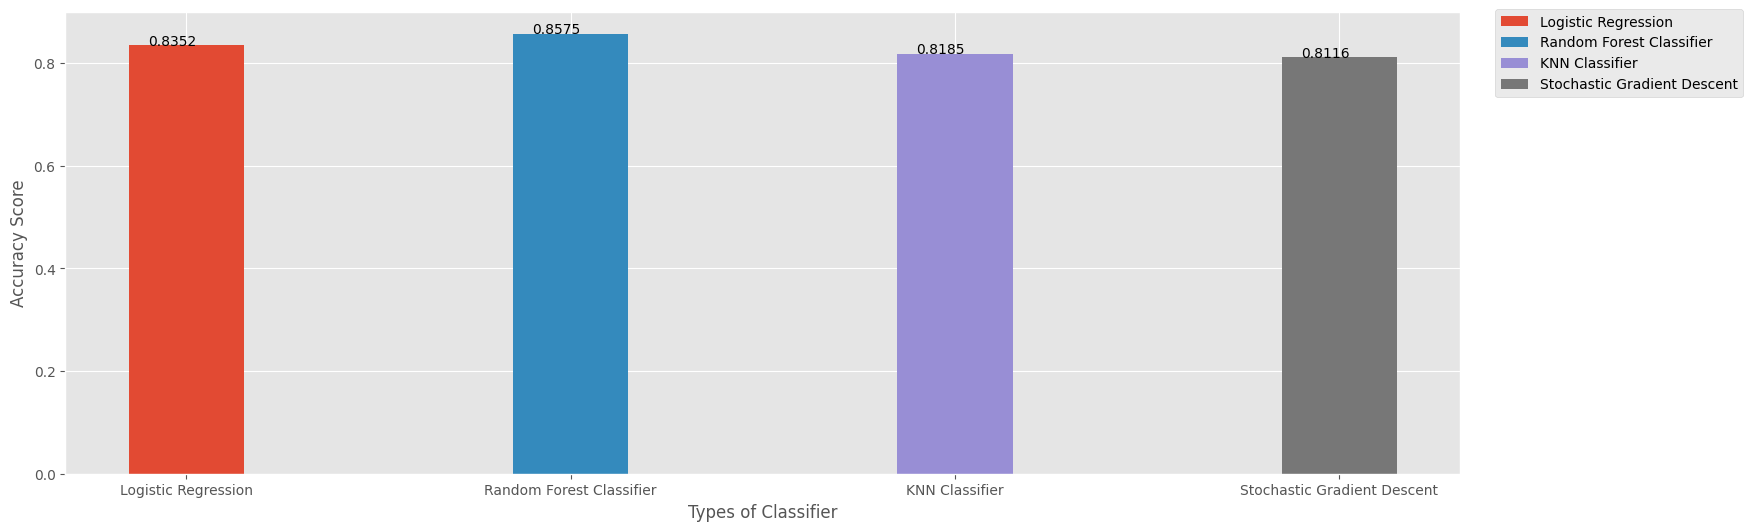

In [105]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()

Random Forest Classifier has the highest AUC score of 0.8597 among all models trained. Therefore, we can produce a conclusion that Random Forest Classifier can most accurately distinguish between classes.

---

# Fine Tune Model

Now, we fine tune the Random Forest Classifier model with the highest performance as evaluated to improve its performance by fine tuning its hyperparameters applied in its algorithm.

Grid Search is used to find the best hyperparameters those can be applied in this algorithm.

In [106]:
# Build Random Forest Classifier with Hyperparameter
rfc = RandomForestClassifier(random_state=1)

# Create param grid
# param_grid = [    
#     {
#     'n_estimators' : [200, 500, 1000],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4, 5, 6, 7, 8],
#     'criterion' : ['gini', 'entropy']
#     }
# ]

param_grid = [    
    {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [7, 8, 9],
    'max_features' : [5, 9, 11],
    'criterion' : ['gini', 'entropy']
    }
]

In [107]:
from sklearn.model_selection import GridSearchCV

# Create grid search object
clf = GridSearchCV(rfc, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1, scoring='accuracy')
print("Performing Grid Search CV...")

# Fit on data
best_clf = clf.fit(X_train, y_train)
print('Done Grid Search!')

Performing Grid Search CV...
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Done Grid Search!


In [108]:
means = best_clf.cv_results_['mean_test_score']
stds = best_clf.cv_results_['std_test_score']
params = best_clf.cv_results_['params']

print('Best Hyperparameter Settings:', best_clf.best_params_)
print('Best Hyperparameter Settings:', best_clf.best_score_)

Best Hyperparameter Settings: {'criterion': 'gini', 'max_depth': 9, 'max_features': 9, 'n_estimators': 100}
Best Hyperparameter Settings: 0.8532274946201446


### Predict New y Based On Fine Tuned Model

In [109]:
y_pred_acc = best_clf.predict(X_train)

### Performance After Fine Tuning

In [110]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred_acc)))

Accuracy Score : 0.8850153627983928
Precision Score : 0.8592329860341388
Recall Score : 0.9197911722828667
F1 Score : 0.8884813753581662
Confusion Matrix : 
[[3613  635]
 [ 338 3876]]


---

# Model Testing

We now apply all models built to predict the output based on test set data, and compare the performance between the fine tuned Random Forest Classifier and other algorithms on test set.

In [111]:
best_model = best_clf.best_estimator_
best_model

RandomForestClassifier(max_depth=9, max_features=9, random_state=1)

In [112]:
#reset the overview dataframe & y_pred accuracy 
overview = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 score"])
y_pred_arr = {}

#original classifier
clf = ["Logistic Regression", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent"]

#new Data
clf.append("Random Forest Classifier (Fine Tuned)")

In [113]:
##Model 1 - Logistic Regression
model1 = LogisticRegression(max_iter=100000)
cross_val(model1, 0, X_test, y_test)

##Model 2 - Random Forest Classifier
model3 = RandomForestClassifier(random_state=1)
cross_val(model2, 1, X_test, y_test)

##Model 3 - K-Nearest Neighbour (KNN)
model4 = KNeighborsClassifier(n_neighbors=14)
cross_val(model3, 2, X_test, y_test)

##Model 4 - Stochastic Gradient Descent (SGD)
model4 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)
cross_val(model4, 3, X_test, y_test)

##Model7 - Random Forest Classifier (Tuned Hyperparameter)
model5 = best_model
cross_val(model5, 4, X_test, y_test)

## Classification Report (Test Set)

In [114]:
for i, a in enumerate([model1, model2, model3, model4, model5]):
    classifyReport(a, i, X_test, y_test)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

       False       0.82      0.85      0.84      1041
        True       0.85      0.82      0.84      1075

    accuracy                           0.84      2116
   macro avg       0.84      0.84      0.84      2116
weighted avg       0.84      0.84      0.84      2116


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.86      0.81      0.84      1041
        True       0.83      0.88      0.85      1075

    accuracy                           0.85      2116
   macro avg       0.85      0.84      0.85      2116
weighted avg       0.85      0.85      0.85      2116


KNN Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.86      0.81      0.84      1041
        True       0.83      0.88      0.85      1075

    accuracy                           0.8

## Confusion Matrix (Test Set)

In [115]:
for i, a in enumerate([model1, model2, model3, model4, model5]):
    confusionMatrix(a, i, X_test, y_test)

Logistic Regression
Confusion Matrix:
[[887 154]
 [192 883]]

Accuracy: 0.8364839319470699
TN, FP, FN, TP :  887 154 192 883


Random Forest Classifier
Confusion Matrix:
[[847 194]
 [133 942]]

Accuracy: 0.8454631379962193
TN, FP, FN, TP :  847 194 133 942


KNN Classifier
Confusion Matrix:
[[847 194]
 [133 942]]

Accuracy: 0.8454631379962193
TN, FP, FN, TP :  847 194 133 942


Stochastic Gradient Descent
Confusion Matrix:
[[835 206]
 [171 904]]

Accuracy: 0.8218336483931947
TN, FP, FN, TP :  835 206 171 904


Random Forest Classifier (Fine Tuned)
Confusion Matrix:
[[835 206]
 [138 937]]

Accuracy: 0.8374291115311909
TN, FP, FN, TP :  835 206 138 937




## Accuracy Graph (Test Set)

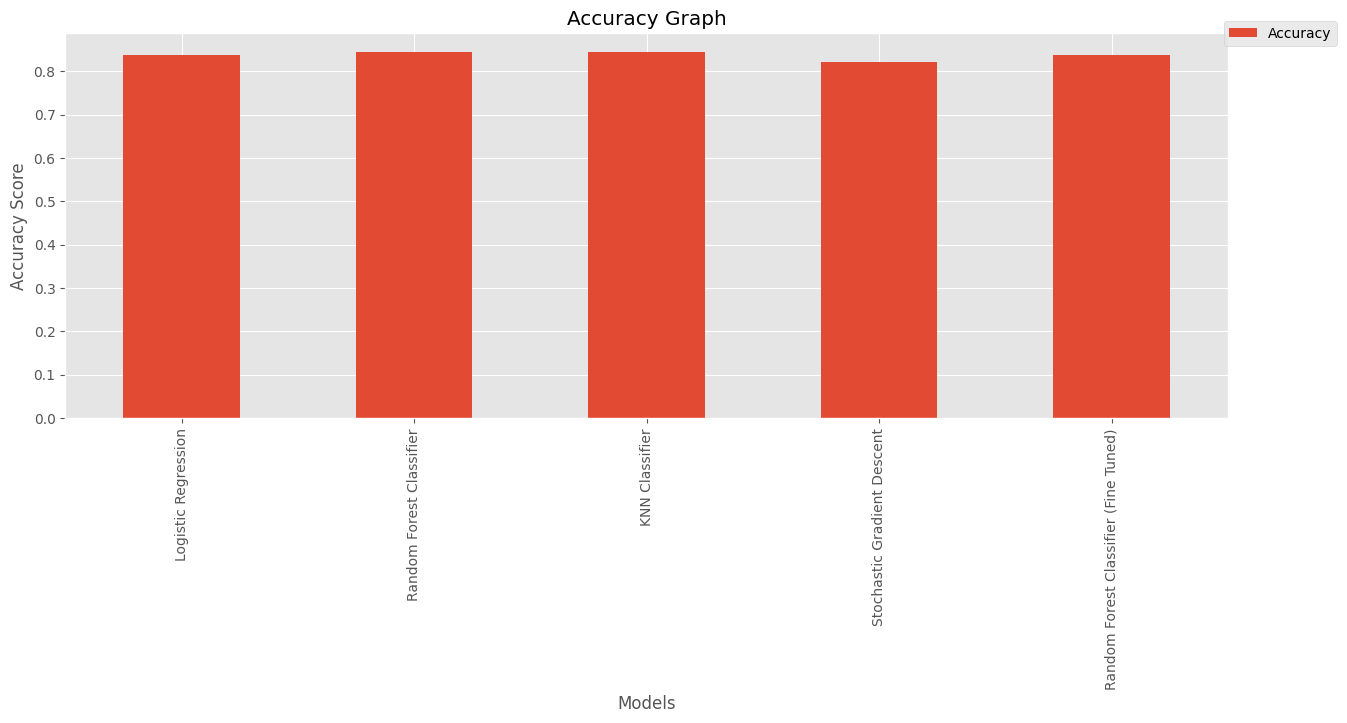

In [116]:
cv_sum()

## Overall Performance (Test Set)

In [117]:
overview

,Fit time,Score time,Accuracy,Precision,Recall,F1 score
Logistic Regression,0.0630,0.0082,0.8365,0.8369,0.8367,0.8365
Random Forest Classifier,0.5328,0.0411,0.8455,0.8471,0.8450,0.8451
KNN Classifier,0.5180,0.0397,0.8455,0.8471,0.8450,0.8451
Stochastic Gradient Descent,0.0375,0.0088,0.8218,0.8228,0.8215,0.8216
Random Forest Classifier (Fine Tuned),0.4755,0.0385,0.8374,0.8391,0.8369,0.8370


The accuracy, precision and f1 score of the Hyperparameter Tuned Random Forest Classifier is higher than the original model before Hyperparameter Tuning.

### Overall Performance Chart (Test Set)

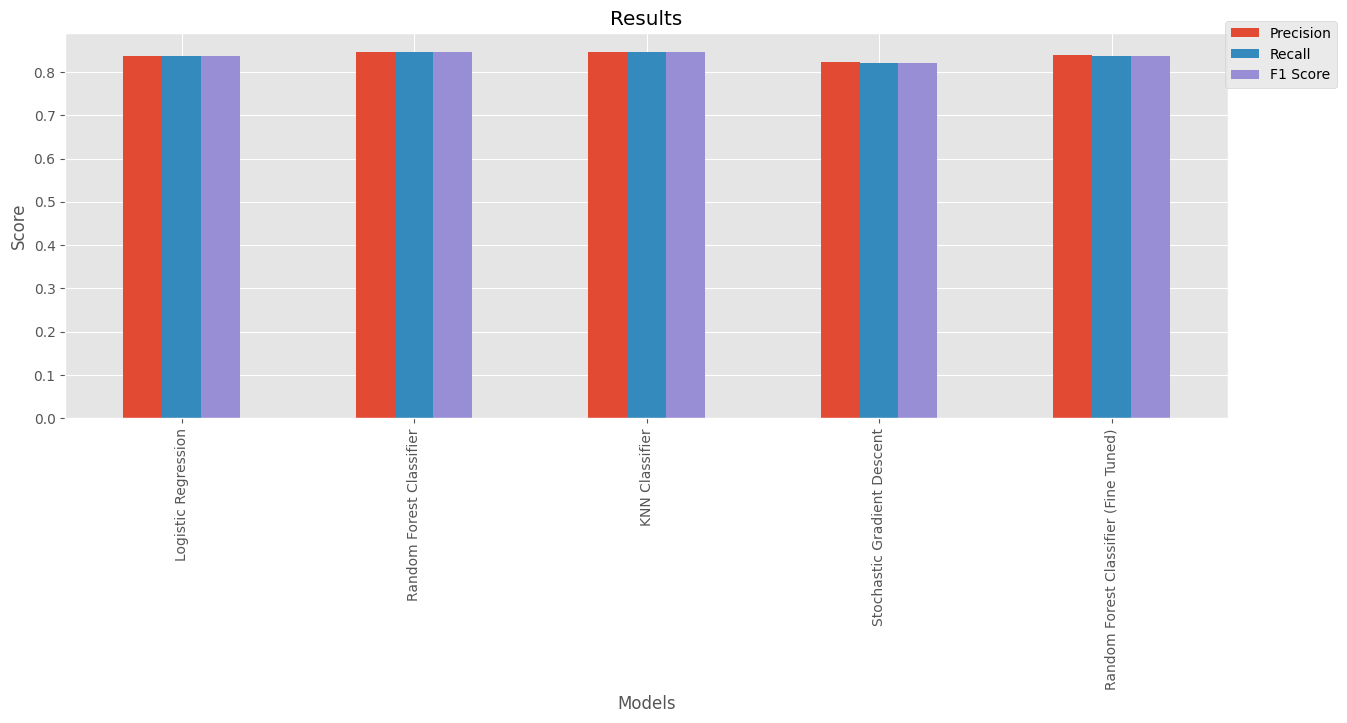

In [118]:
performance_sum()

### Precision-Recall Curve (Test Set)

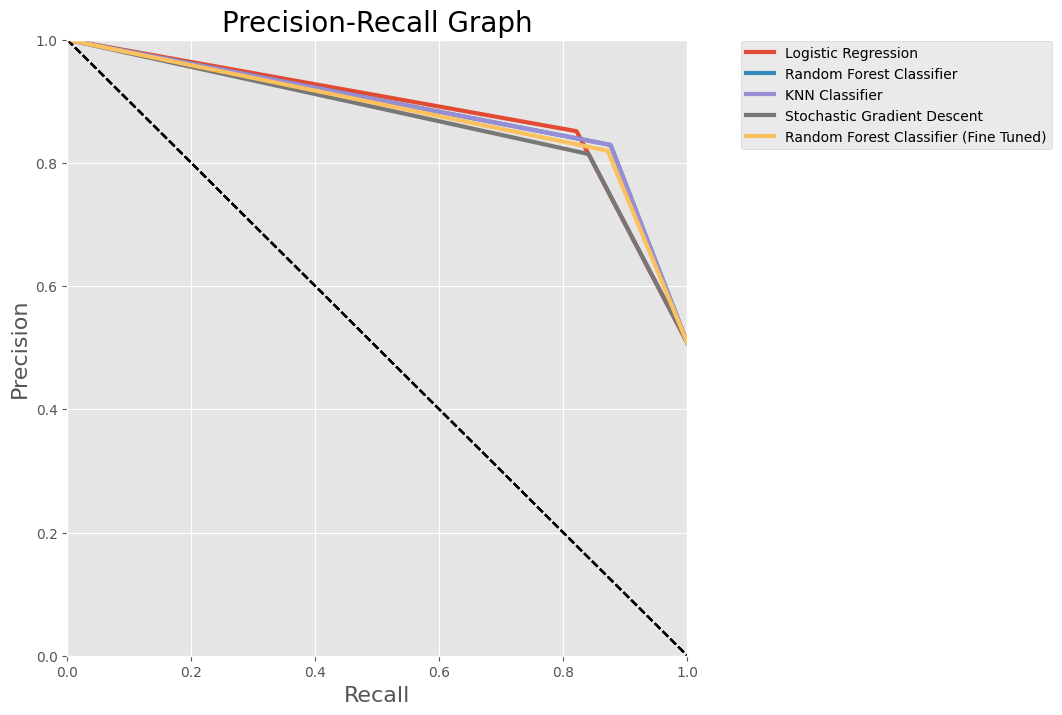

In [119]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(5):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i, X_test, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.6, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

The Random Forest Classifier after Fine Tuned is closest to the top right part of the graph than its original model. Thus, it performs better than its original model without fine tune in the PR Curve.

### ROC Curve (Test Set)

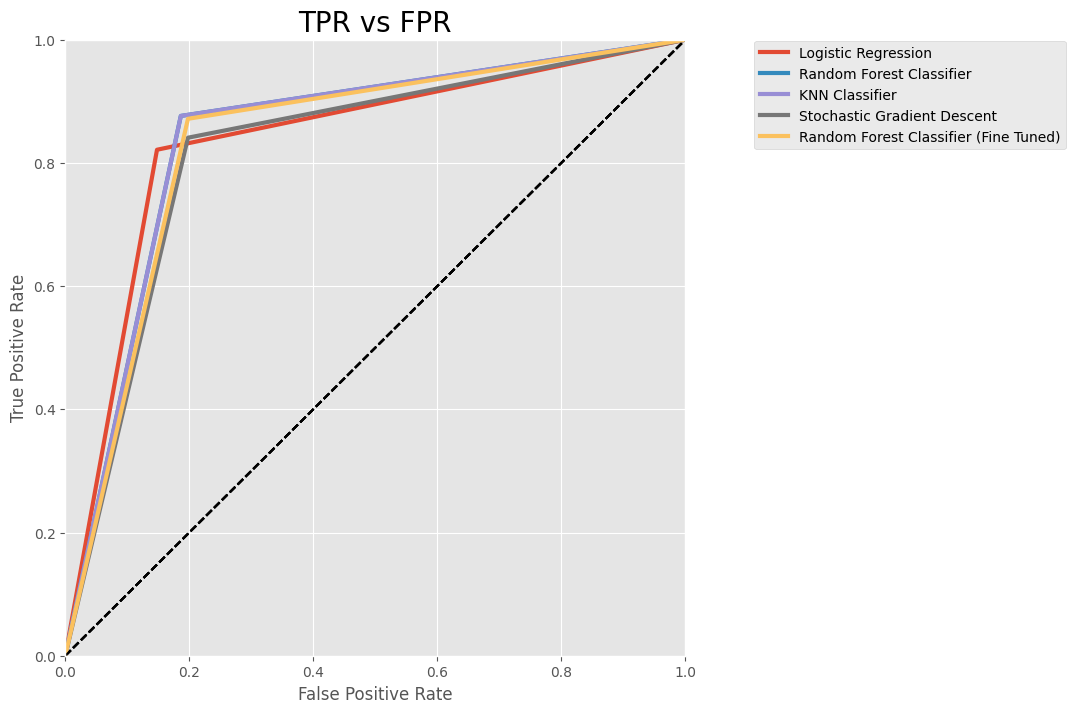

In [120]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(5):
    plot_roc_curve(i, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

The Random Forest Classifier after Fine Tuned is the nearest model to the top left part of the graph than its original model. Thus, it performs better than its original model without fine tune in the ROC Curve also.

### AUC Score (Test Set)

In [121]:
roc_auc_score_arr = [roc_auc_score(y_test, y_pred_arr[clf[i]]) for i in range(5)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

,AUC Score
Logistic Regression,0.836730
Random Forest Classifier,0.844960
KNN Classifier,0.844960
Stochastic Gradient Descent,0.821522
Random Forest Classifier (Fine Tuned),0.836871


The Random Forest Classifier after Fine Tuned has the highest AUC Score of 0.8407 among all models trained and give the best performance.

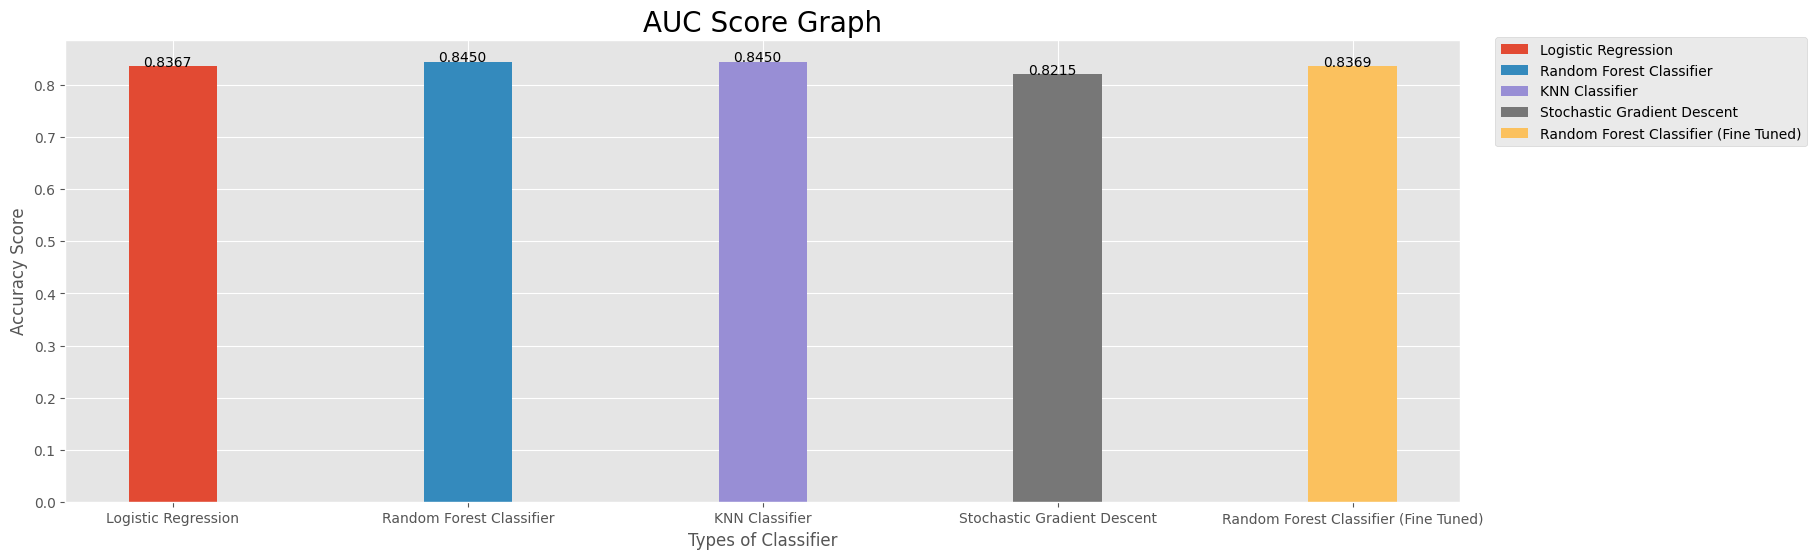

In [122]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.title('AUC Score Graph', fontsize=20)
plt.show()

# Conclusion

We conclude the fine tuned Random Forest Classifier will be the best model performed on the test set among all models trained.

# Feature Importantce

## Random Forest Classifier (Fine Tuned)

In [124]:
importance = best_model.feature_importances_

features = X_train.columns
important_list = sorted(zip(importance,features), reverse=True)
important_table = pd.DataFrame(important_list, columns=['Score','Feature'])

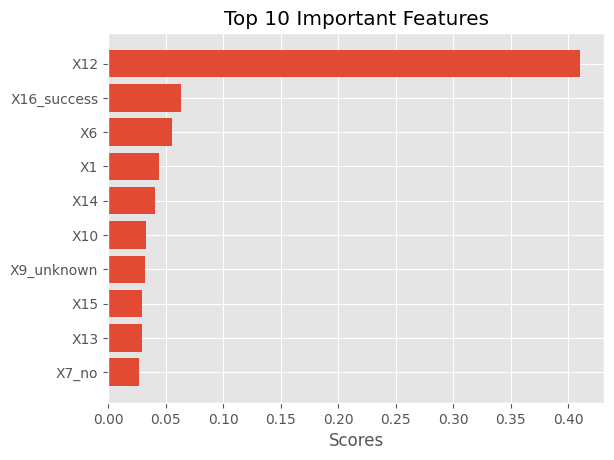

In [125]:
y = range(10) # only display 10 features
top10feature = important_table[:10]['Feature']
top10score = important_table[:10]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Important Features')
plt.barh(y,top10score[::-1], align='center') 
plt.yticks(y,top10feature[::-1])
plt.xlabel('Scores')
plt.show()

From the above results, we observe the ten most important features determined by the best model after fine tuned the Random Forest Classifier.

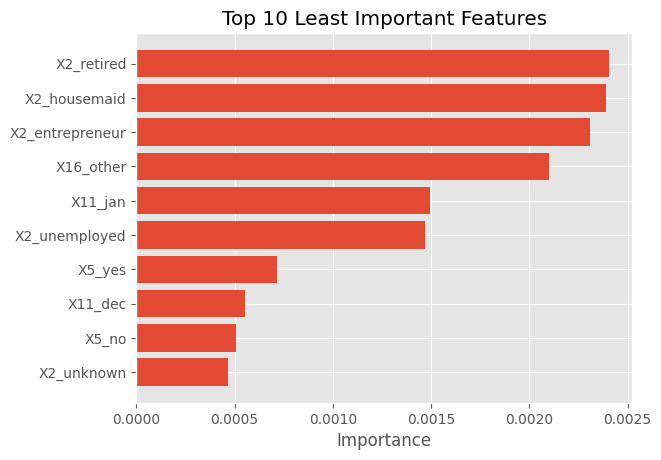

In [126]:
last10feature = important_table[-10:]['Feature']
last10score = important_table[-10:]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Least Important Features')
plt.barh(y, last10score[::-1], align='center')  # [::-1] starts from end to the first index
plt.yticks(y, last10feature[::-1])
plt.xlabel('Importance')
plt.show()

The above figure illustrates the top 10 least important features determined by the best model.

---